### mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/300/'

os.chdir(current_path)

Mounted at /content/drive


### requirements

In [2]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from funcs_indicator import *
# import matplotlib.pyplot as plt

# import mpl_finance as mf
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
# import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

### load data

In [3]:
os.chdir(current_path)


interval = '30m'
interval = '5m'
interval = '1m'

date_path = './candlestick_concated/%s/2021-04-27/' % interval
date_path = './candlestick_concated/%s/2021-05-17/' % interval
# date_path = './candlestick_concated/%s/2021-06-14/' % interval
date_path = './candlestick_concated/%s/eth_set/' % interval
file_list = os.listdir(date_path)

print((file_list))

['2021-05-17 ETHUSDT.xlsx', '2021-04-18 ETHUSDT.xlsx', '2021-03-19 ETHUSDT.xlsx', '2021-02-17 ETHUSDT.xlsx', '2021-01-18 ETHUSDT.xlsx', '2020-12-19 ETHUSDT.xlsx', '2020-11-19 ETHUSDT.xlsx', '2020-10-20 ETHUSDT.xlsx', '2020-09-20 ETHUSDT.xlsx', '2020-08-21 ETHUSDT.xlsx', '2020-07-22 ETHUSDT.xlsx', '2020-06-22 ETHUSDT.xlsx', '2020-05-23 ETHUSDT.xlsx', '2020-04-23 ETHUSDT.xlsx']


### weather data

In [ ]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13574144/13568290 [==============================] - 0s 0us/step


In [ ]:
df = pd.read_csv(csv_path)
# slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]

date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [ ]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# The above inplace edits are reflected in the DataFrame
df['wv (m/s)'].min()

0.0

In [ ]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

### basic fishing (not concerned about rapid descending)

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


start_stamp = 0
# start_stamp = datetime.timestamp(pd.to_datetime('2021-02-12'))
print("start_stamp :", start_stamp)
# break

np.random.shuffle(file_list)
candis = file_list

prev_x = None
total_x = None

seed = 1
random_state = 201
np.random.seed(seed)

fee = 0.0006
lvrg = 1

tp_list = np.arange(0.0, 0.05, 0.001)
lvrg_list = range(1, 10)
lvrg_list = range(3, 7)
lvrg_list = range(6, 10)
lvrg_list = range(1, 2)
lvrg_list = range(5, 6)

for i in tqdm(range(len(candis))):

  keys = [candis[i]]

  # if 'neo'.upper() not in candis[i]:
  #   continue
  
  # if 'btc'.upper() not in candis[i]:
  #   continue

  if 'eth'.upper() not in candis[i]:
    continue

  for key in keys:  
    
    ohlcv = pd.read_excel(date_path + key, index_col=0)
    print('len(ohlcv) :', len(ohlcv))

start_stamp : 0


len(ohlcv) : 43200
len(ohlcv) : 43200
len(ohlcv) : 43200
len(ohlcv) : 43200
len(ohlcv) : 43200
len(ohlcv) : 43200
len(ohlcv) : 43200
len(ohlcv) : 43200



### check data

In [ ]:
df = ohlcv

# df['pr'] = df['close'].pct_change()

#   진입 구간과 이탈 구간에서 발생하는 pr 만들기    #
window_size = 30
input_size = 15
label_size = 15

# fee = 0.0006
df['pr'] = df['close'].shift(-(label_size - 1)) / df['close']

# print(df['close'].head(20))
# print(df['close'].shift(-14).head(20))
# break

# sar = lucid_sar(ohlcv)
# ha_ohlc = heikinashi(ohlcv).iloc[:, :4]
# ema1, ema2, ema3 = ema_ribbon(ohlcv)
# senkou1, senkou2 = ichimoku(ohlcv)
# cbo, ema_cbo = cct_bbo(ohlcv, 21, 13) 

# _, _, bbw = bb_width(ohlcv, 20, 2) 

df['fish60'] = fisher(ohlcv, 60)
df['trix'] = trix_hist(ohlcv, 14, 1, 5) 
# rsi_ = rsi(ohlcv)
df['macd_hist'] = macd(ohlcv)

print(df.describe().transpose())
print(df.head())

             count         mean          std        min         25%         50%          75%           max
open       43158.0    57.060482    11.146749  35.812000   50.250000   54.630500    59.205000     96.936000
high       43158.0    57.176237    11.170398  36.023000   50.324000   54.756000    59.334250     96.991000
low        43158.0    56.950283    11.119606  35.608000   50.179000   54.501000    59.090750     96.606000
close      43158.0    57.059677    11.145354  35.810000   50.250000   54.626500    59.202750     96.941000
volume     43158.0  1489.701045  1795.940516   7.210000  520.762500  939.715000  1765.307500  43261.820000
fish60     43099.0     0.081617     2.115557  -7.597697   -1.412469    0.082844     1.538933      7.600032
trix       43153.0    -0.000001     0.008610  -0.210661   -0.003693   -0.000176     0.003489      0.143847
macd_hist  43134.0     0.000016     0.064342  -1.418948   -0.026375   -0.001310     0.025164      1.277708
pr         43144.0     0.999868     0

### remove nan data

In [ ]:
print((np.isnan(df.values)))
print(np.sum(np.isnan(df.values), axis=0))

max_nan = np.max(np.sum(np.isnan(df.values), axis=0))
print(max_nan)

[[False False False ...  True  True False]
 [False False False ...  True  True False]
 [False False False ...  True  True False]
 ...
 [False False False ... False False  True]
 [False False False ... False False  True]
 [False False False ... False False  True]]
[ 0  0  0  0  0 59  5 24 14]
59


In [ ]:
df = df.iloc[max_nan:]

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
open,43099.0,5.700741e+01,11.061601,35.812000,50.246500,54.612000,59.171500,96.327000
high,43099.0,5.712307e+01,11.085147,36.023000,50.319500,54.740000,59.291000,96.399000
low,43099.0,5.689730e+01,11.034557,35.608000,50.175000,54.489000,59.049500,96.086000
close,43099.0,5.700663e+01,11.060301,35.810000,50.246500,54.611000,59.174000,96.343000
volume,43099.0,1.489266e+03,1796.666719,7.210000,520.400000,939.320000,1764.790000,43261.820000
fish60,43099.0,8.161715e-02,2.115557,-7.597697,-1.412469,0.082844,1.538933,7.600032
trix,43099.0,4.524042e-07,0.008613,-0.210661,-0.003691,-0.000175,0.003491,0.143847
macd_hist,43099.0,1.229285e-05,0.064344,-1.418948,-0.026357,-0.001309,0.025156,1.277708
pr,43085.0,9.998716e-01,0.012451,0.639682,0.995079,0.999890,1.005022,1.317199


### macd gaussian survey

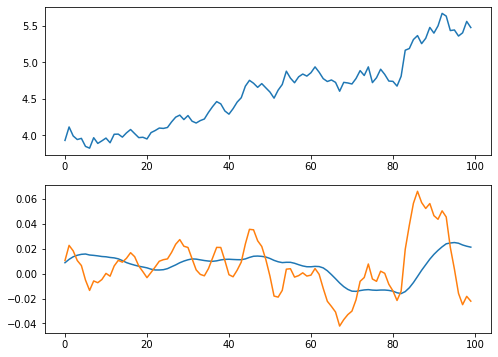

In [ ]:
from scipy.ndimage.filters import gaussian_filter1d


g_curve = [np.nan] * len(df)
period = 20
sigma = 20

for i in range(period, len(df)):

  macd_hist = df['macd_hist'].values[i + 1 - period:i + 1]
  macd_hist_g = gaussian_filter1d(macd_hist, sigma=sigma, mode='reflect')
  g_curve[i] = macd_hist_g[-1] 

plot_size = 100

plt.subplot(211)
plt.plot(df['close'].values[period:][:plot_size])

plt.subplot(212) 
plt.plot(g_curve[period:][:plot_size])
plt.plot(df['macd_hist'].values[period:][:plot_size])

plt.show()

#### pr survey on gaussina macd

12777
12777
12777


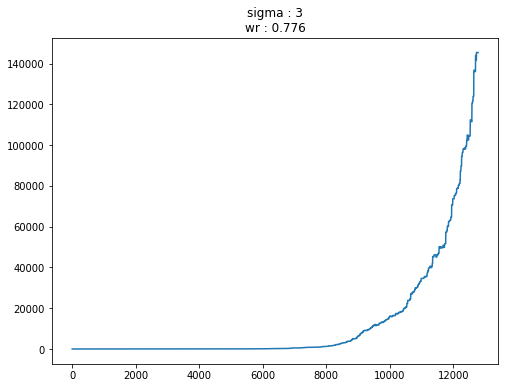

In [ ]:

g_curve = [np.nan] * len(df)
period = 20
sigma = 20

# for sigma in range(10, 50, 2):
# for sigma in range(1, 10, 1):
for sigma in range(3, 4, 1):

  #     realtime gaussian   #
  # for i in range(period, len(df)):

  #   macd_hist = df['macd_hist'].values[i + 1 - period:i + 1]
  #   macd_hist_g = gaussian_filter1d(macd_hist, sigma=sigma, mode='reflect')
  #   g_curve[i] = macd_hist_g[-1] 

  #     non realtime    #
  macd_hist = df['macd_hist'].values
  macd_hist_g = gaussian_filter1d(macd_hist, sigma=sigma, mode='reflect')
  g_curve = macd_hist_g

  g_curve_series = pd.Series(g_curve[period:])
  # print(g_curve_series.head())
  # break

  short_sig = np.where((g_curve_series.shift(1) < g_curve_series.shift(2)) &
                      (g_curve_series.shift(2) > g_curve_series.shift(3)), 1, 0)

  long_sig = np.where((g_curve_series.shift(1) > g_curve_series.shift(2)) &
                      (g_curve_series.shift(2) < g_curve_series.shift(3)), 1, 0)
  # print(short_sig)
  # break


  # print(np.argwhere(short_sig == 1).reshape(-1, ))
  # break

  short_sig_arg = np.argwhere(short_sig == 1).reshape(-1, )
  long_sig_arg = np.argwhere(long_sig == 1).reshape(-1, )
  print(len(long_sig))
  print(len(short_sig))

  close = df['close'].values[period:]
  print(len(close))
  # break

  #       1. check long version first    #
  #       2. entry long signal on close    #
  lvrg = 1
  fee = 0.0006
  pr_list = []

  for i in range(len(long_sig)):
    
    if long_sig[i]:

      ep = close[i]

      for j in range(i + 1, len(long_sig)):

        if short_sig[j]:

          pr = (close[j] / ep - 1 - fee) * lvrg + 1
          # print(pr)
          break

    else:

      pr = 1

    pr_list.append(pr)

  pr_list = np.array(pr_list)
  wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

  plt.plot(np.cumprod(pr_list))
  plt.title("sigma : %s\nwr : %.3f" % (sigma, wr))
  plt.show()



  


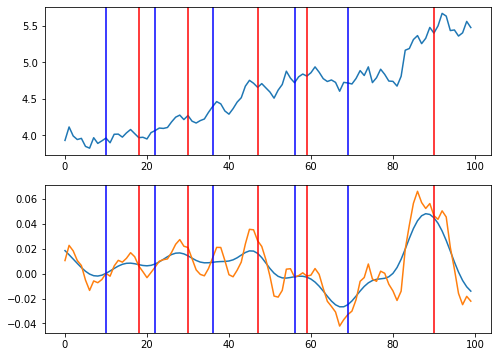

In [ ]:
g_curve_series = pd.Series(g_curve[period:])
# print(g_curve_series.head())
# break

short_sig = np.where((g_curve_series.shift(1) < g_curve_series.shift(2)) &
                    (g_curve_series.shift(2) > g_curve_series.shift(3)), 1, 0)

long_sig = np.where((g_curve_series.shift(1) > g_curve_series.shift(2)) &
                    (g_curve_series.shift(2) < g_curve_series.shift(3)), 1, 0)
# print(short_sig)
# break


# print(np.argwhere(short_sig == 1).reshape(-1, ))
# break

short_sig_arg = np.argwhere(short_sig == 1).reshape(-1, )
long_sig_arg = np.argwhere(long_sig == 1).reshape(-1, )

plot_size = 100

plt.subplot(211)
plt.plot(df['close'].values[period:][:plot_size])

for x_i in long_sig_arg:
  
  if x_i > plot_size:
    break

  plt.axvline(x_i, color='b')

for x_i in short_sig_arg:
  
  if x_i > plot_size:
    break

  plt.axvline(x_i, color='r')

plt.subplot(212) 
plt.plot(g_curve[period:][:plot_size])
plt.plot(df['macd_hist'].values[period:][:plot_size])

for x_i in long_sig_arg:
  
  if x_i > plot_size:
    break

  plt.axvline(x_i, color='b')

for x_i in short_sig_arg:
  
  if x_i > plot_size:
    break

  plt.axvline(x_i, color='r')


plt.show()

### time survey

In [ ]:
timestamp_s = df.index.map(datetime.datetime.timestamp)

# print(timestamp_s)

day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

print(df.head())

plt.plot(np.array(df['Day sin'])[:250])
plt.plot(np.array(df['Day cos'])[:250])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

### target column

In [ ]:
# target = "close"
target = "pr"
# target = 'T (degC)'

#### fft

In [ ]:
fft = tf.signal.rfft(df[target])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df[target])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
# plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

### data proc

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]
print("num_features :", num_features)
print("column_indices :", column_indices)

num_features : 12
column_indices : {'open': 0, 'high': 1, 'low': 2, 'close': 3, 'volume': 4, 'fish60': 5, 'trix': 6, 'macd_hist': 7, 'Day sin': 8, 'Day cos': 9, 'Year sin': 10, 'Year cos': 11}


### scaling

In [ ]:
# train_mean = train_df.mean()
# train_std = train_df.std()

# train_df = (train_df - train_mean) / train_std
# val_df = (val_df - train_mean) / train_std
# test_df = (test_df - train_mean) / train_std

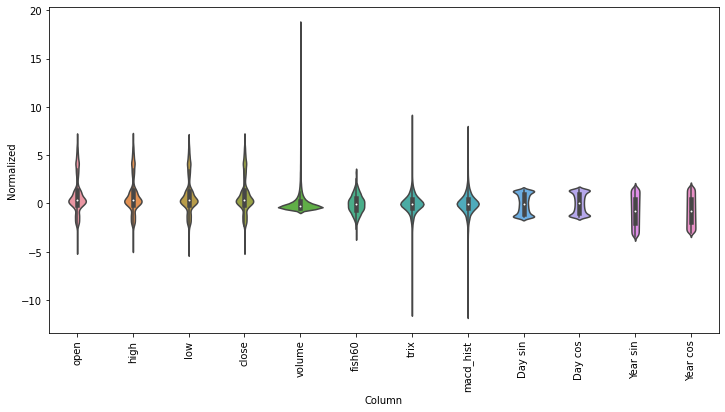

In [ ]:
# df_std = (df - train_mean) / train_std
# df_std = df_std.melt(var_name='Column', value_name='Normalized')
# plt.figure(figsize=(12, 6))
# ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
# _ = ax.set_xticklabels(df.keys(), rotation=90)

### windowing + retrain

#### window settings

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


start_stamp = 0
# start_stamp = datetime.timestamp(pd.to_datetime('2021-02-12'))
print("start_stamp :", start_stamp)
# break

np.random.shuffle(file_list)
candis = file_list

prev_x = None
total_x = None

seed = 1
random_state = 201
np.random.seed(seed)

fee = 0.0006
lvrg = 1

window_size = 30
input_size = 15
label_size = 15

target = "pr"

start_stamp : 0


#### make datasets

In [12]:
data_x, data_labels = [], []
data_x_labels = []

fee = 0.0006

# close_x, label_close_x = [], []
# data_index = []

for i in tqdm(range(len(candis))):

  keys = [candis[i]]

  # if 'neo'.upper() not in candis[i]:
    # continue
  
  # if 'btc'.upper() not in candis[i]:
  #   continue

  if 'eth'.upper() not in candis[i]:
    continue

  for key in keys:  
    
    ohlcv = pd.read_excel(date_path + key, index_col=0)
    print('len(ohlcv) :', len(ohlcv))
    df = ohlcv

    # df['pr'] = df['close'].pct_change()

    #   진입 구간과 이탈 구간에서 발생하는 pr 만들기    #

    # df['pr'] = df['close'].shift(-(label_size - 1)) / df['close']

    #         post fee adjustment       #
    df['pr'] = df['close'].shift(-(label_size - 1)) / df['close'] - fee

    # print(df['close'].head(20))
    # print(df['close'].shift(-14).head(20))
    # break

    # sar = lucid_sar(ohlcv)
    # ha_ohlc = heikinashi(ohlcv).iloc[:, :4]
    # ema1, ema2, ema3 = ema_ribbon(ohlcv)
    # senkou1, senkou2 = ichimoku(ohlcv)
    # cbo, ema_cbo = cct_bbo(ohlcv, 21, 13) 

    # _, _, bbw = bb_width(ohlcv, 20, 2) 

    df['fish60'] = fisher(ohlcv, 60)
    df['trix'] = trix_hist(ohlcv, 14, 1, 5) 
    # rsi_ = rsi(ohlcv)
    df['macd_hist'] = macd(ohlcv)

    # print(df.describe().transpose())
    # print(df.head())

    # print((np.isnan(df.values)))
    print("np.sum(np.isnan(df.values), axis=0) :", np.sum(np.isnan(df.values), axis=0))

    max_nan = np.max(np.sum(np.isnan(df.values), axis=0))
    # print(max_nan)

    df = df.iloc[max_nan:-max_nan]

    print("df.describe().transpose() :", df.describe().transpose())


    column_indices = {name: i for i, name in enumerate(df.columns)}
    num_features = df.shape[1]
    print("num_features :", num_features)
    print("column_indices :", column_indices)
    
    target_label_index = column_indices[target]

    from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
    min_max = MinMaxScaler()
    std_scale = StandardScaler()

    def min_max_scale(npy_x):

      return (npy_x - np.min(npy_x)) / (np.max(npy_x) - np.min(npy_x))


    #       local scaling     #
    shift_size = window_size
    # shift_size = 1

    for i in range(input_size, len(df), shift_size):
        
        # temp_data = df.values[i - input_size:i]
        # temp_labels = df.values[i:i + label_size]

        # scaled_data = min_max_scale(df.values[i - input_size:i + label_size])
        # scaled_data = min_max.fit_transform(df.values[i - input_size:i + label_size])
        # temp_data = scaled_data[:input_size]
        # temp_labels = scaled_data[input_size:]

        #     ohlc    #
        temp_data = min_max_scale(df.values[i - input_size:i, :4])
        
        prev_data = df.values[i - input_size:i, :4]
        label_data = df.values[i: i + label_size, :4]
        temp_x_labels = (label_data - np.min(prev_data)) / (np.max(prev_data) - np.min(prev_data))

        temp_labels = df.values[i, target_label_index]

        # temp_data = std_scale.fit_transform(df.values[i - input_size:i])
        # # temp_labels = std_scale.transform(df.values[i:i + label_size])
        # temp_labels = df.values[i + shift - input_size:i + shift]

        # print(df.index[i - input_size:i][-1])
        # print(df.index[i:i + label_size][0])
        # print()

        if np.isnan(np.sum(temp_data)):
          continue

        data_x.append(temp_data)
        data_x_labels.append(temp_x_labels)
        data_labels.append(temp_labels)
        # close_x.append(df.values[i - input_size:i, [3]])
        # label_close_x.append(df.values[i:i + label_size, [3]])


data_x = np.array(data_x).astype(np.float32)
data_x_labels = np.array(data_x_labels).astype(np.float32)
data_labels = np.array(data_labels).astype(np.float32)

# print(len(df) - total_window_size)
print("data_x.shape :", data_x.shape)
print("data_x_labels.shape :", data_x_labels.shape)
print("data_labels.shape :", data_labels.shape)

print("data_x.dtype :", data_x.dtype)
print("data_labels.dtype :", data_labels.dtype)

len(ohlcv) : 43200
np.sum(np.isnan(df.values), axis=0) : [ 0  0  0  0  0 14 59  5 24]
df.describe().transpose() :              count          mean          std         min         25%         50%          75%           max
open       43082.0  3.586237e+02    14.935182  314.460000  346.760000  355.550000   373.010000    395.190000
high       43082.0  3.588062e+02    14.914505  315.690000  346.900000  355.750000   373.180000    395.430000
low        43082.0  3.584432e+02    14.954530  312.360000  346.600000  355.360000   372.890000    394.960000
close      43082.0  3.586242e+02    14.934597  314.490000  346.760000  355.555000   373.010000    395.190000
volume     43082.0  1.126310e+03  2151.095796    0.000000  302.977500  597.905500  1192.283750  68560.164000
pr         43082.0  9.994058e-01     0.002990    0.970988    0.998024    0.999400     1.000785      1.037619
fish60     43082.0  4.915092e-02     1.848021   -7.578573   -1.262859    0.057795     1.300345      7.597552
trix       430

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in true_divide


len(ohlcv) : 43200
np.sum(np.isnan(df.values), axis=0) : [ 0  0  0  0  0 14 59  5 24]
df.describe().transpose() :              count          mean          std          min          25%          50%          75%           max
open       43082.0  1.989269e+03   247.759541  1548.620000  1782.180000  2015.570000  2139.980000   2549.630000
high       43082.0  1.990787e+03   248.091093  1556.730000  1783.250000  2017.315000  2141.480000   2553.000000
low        43082.0  1.987715e+03   247.422594  1540.220000  1781.110000  2013.860000  2138.610000   2545.880000
close      43082.0  1.989276e+03   247.758822  1548.630000  1782.182500  2015.590000  2139.990000   2549.890000
volume     43082.0  1.514921e+03  1922.656609    45.570000   562.486750   955.006500  1713.410250  43569.869000
pr         43082.0  9.994589e-01     0.004357     0.913687     0.997493     0.999501     1.001467      1.072569
fish60     43082.0  2.627887e-01     1.878803    -7.577673    -0.977356     0.275406     1.499992     

#### save dataset

In [13]:
pair_name = key.split(".")[0].split(" ")[1]
x_save_path = current_path + 'npy/' + 'inner_tick_cnn_x_postfee_%s_%s_%s_%s.npy' % (input_size, label_size, pair_name, len(data_x))
x_label_save_path = current_path + 'npy/' + 'inner_tick_cnn_x_label_postfee_%s_%s_%s_%s.npy' % (input_size, label_size, pair_name, len(data_x))
label_save_path = current_path + 'npy/' + 'inner_tick_cnn_label_postfee_%s_%s_%s_%s.npy' % (input_size, label_size, pair_name, len(data_x))

# x_save_path = current_path + 'npy/' + 'inner_tick_cnn_x_%s_%s_%s_%s.npy' % (input_size, label_size, pair_name, len(data_x))
# x_label_save_path = current_path + 'npy/' + 'inner_tick_cnn_x_label_%s_%s_%s_%s.npy' % (input_size, label_size, pair_name, len(data_x))
# label_save_path = current_path + 'npy/' + 'inner_tick_cnn_label_%s_%s_%s_%s.npy' % (input_size, label_size, pair_name, len(data_x))

np.save(x_save_path, data_x)
np.save(x_label_save_path, data_x_labels)
np.save(label_save_path, data_labels)


#### load dataset

In [5]:
key = "dates ETHUSDT.xlsx"
len_data_x = 20103

pair_name = key.split(".")[0].split(" ")[1]
x_save_path = current_path + 'npy/' + 'inner_tick_cnn_x_postfee_%s_%s_%s_%s.npy' % (input_size, label_size, pair_name, len(data_x))
x_label_save_path = current_path + 'npy/' + 'inner_tick_cnn_x_label_postfee_%s_%s_%s_%s.npy' % (input_size, label_size, pair_name, len(data_x))
label_save_path = current_path + 'npy/' + 'inner_tick_cnn_label_postfee_%s_%s_%s_%s.npy' % (input_size, label_size, pair_name, len(data_x))

# x_save_path = current_path + 'npy/' + 'inner_tick_cnn_x_%s_%s_%s_%s.npy' % (input_size, label_size, pair_name, len_data_x)
# x_label_save_path = current_path + 'npy/' + 'inner_tick_cnn_x_label_%s_%s_%s_%s.npy' % (input_size, label_size, pair_name, len_data_x)
# label_save_path = current_path + 'npy/' + 'inner_tick_cnn_label_%s_%s_%s_%s.npy' % (input_size, label_size, pair_name, len_data_x)

data_x = np.load(x_save_path)
data_x_labels = np.load(x_label_save_path)
data_labels = np.load(label_save_path)

print("data_x.shape :", data_x.shape)
print("data_x_labels.shape :", data_x_labels.shape)
print("data_labels.shape :", data_labels.shape)

data_x.shape : (20103, 15, 4)
data_x_labels.shape : (20103, 15, 4)
data_labels.shape : (20103,)


### single step models

In [14]:
MAX_EPOCHS = 100
# MAX_EPOCHS = 1000
# MAX_EPOCHS = 500

patience = MAX_EPOCHS // 5
# patience = 2

ckpt_path = current_path + 'ckpt/'

def compile_and_fit(model, model_name, train_flow, val_flow, class_weight, patience=patience):

  tf.keras.backend.clear_session()

  checkpoint = tf.keras.callbacks.ModelCheckpoint(ckpt_path + model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='auto')

  model.compile(loss='categorical_crossentropy', 
                optimizer=tf.optimizers.Adam(learning_rate=1e-5, decay=5e-6), 
                # optimizer=tf.optimizers.Adam(learning_rate=1e-6, decay=5e-7), 
                metrics=['accuracy'])
  
  # model.compile(loss='categorical_crossentropy', 
  # model.compile(loss=tf.losses.SparseCategoricalCrossentropy(), 
  #               optimizer=tf.optimizers.Adam(learning_rate=1e-3, decay=1e-4),
  #               metrics=[tf.metrics.Accuracy()])

  # model.compile(loss=tf.losses.MeanSquaredError(),
  #               # optimizer=tf.optimizers.Adam(learning_rate=1e-4, decay=1e-5),
  #               optimizer=tf.optimizers.Adam(learning_rate=1e-3, decay=1e-4),
  #               metrics=[tf.metrics.MeanAbsoluteError()])
  

  history = model.fit(train_flow, epochs=MAX_EPOCHS,
                      validation_data=val_flow,
                      callbacks=[checkpoint, early_stopping],
                      # callbacks=[early_stopping],
                      class_weight=class_weight)
  return history

#### models

#### cnn 2d

In [15]:
# cnn2d_model = tf.keras.Sequential([
                                 
#       # Shape => [batch, 1, conv_units]
#       # tf.keras.layers.Input(shape=)
#       tf.keras.layers.Conv2D(32, activation='relu', kernel_size=3),
#       tf.keras.layers.Conv2D(64, activation='relu', kernel_size=3),
#       tf.keras.layers.Conv2D(128, activation='relu', kernel_size=3),
#       tf.keras.layers.Conv2D(256, activation='relu', kernel_size=3),
      
#       tf.keras.layers.Flatten(),
#       tf.keras.layers.Dense(128, activation='relu'),
#       tf.keras.layers.Dense(64, activation='relu'),

#       tf.keras.layers.Dense(2, activation="softmax")
# ])


def cnn2d_model(input_shape):

    visible = tf.keras.layers.Input(shape=input_shape, name='input')
    
    net = tf.keras.layers.Conv2D(32, kernel_size=3, padding='same', kernel_initializer='he_normal')(visible)
    # net = tf.keras.layers.Conv2D(256, kernel_size=3, padding='same', kernel_initializer='he_normal')(visible)
    # net = tf.keras.layers.BatchNormalization()(net)
    net = tf.keras.layers.LeakyReLU()(net)

    net = tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal')(net)
    # net = tf.keras.layers.Conv2D(128, kernel_size=3, padding='same', kernel_initializer='he_normal')(net)
    # net = tf.keras.layers.BatchNormalization()(net)
    # net = tf.keras.layers.Activation('relu')(net)
    net = tf.keras.layers.LeakyReLU()(net)
    # net = tf.keras.layers.MaxPool2D(pool_size=2)(net)
    # net = tf.keras.layers.AveragePooling2D(padding='same')(net)


    # net = tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', kernel_initializer='he_normal')(net)
    net = tf.keras.layers.Conv2D(128, kernel_size=3, padding='same', kernel_initializer='he_normal')(net)
    net = tf.keras.layers.LeakyReLU()(net)

    net = tf.keras.layers.Conv2D(256, kernel_size=3, padding='same', kernel_initializer='he_normal')(net)
    # net = tf.keras.layers.BatchNormalization()(net)
    # net = tf.keras.layers.Activation('relu')(net)
    net = tf.keras.layers.LeakyReLU()(net)
    # net = tf.keras.layers.MaxPool2D(pool_size=2)(net)

    net = tf.keras.layers.Flatten()(net)
    net = tf.keras.layers.Dense(128)(net)
    net = tf.keras.layers.LeakyReLU()(net)

    net = tf.keras.layers.Dense(64)(net)
    net = tf.keras.layers.LeakyReLU()(net)

    net = tf.keras.layers.Dense(2, activation='softmax')(net)

    # create model 
    model = tf.keras.models.Model(inputs=visible, outputs=net)
    # summary layers
    # print(model.summary())
    
    return model

##### lstm

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(1)
])


In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dropout(0.3),
    # Shape => [batch, time, features]
    
    tf.keras.layers.Dense(units=1)
])


##### cnn

In [ ]:
CONV_WIDTH = 3

cnn_model = tf.keras.Sequential([
                                 
      # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
      tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
      # Shape => [batch, 1, conv_units]
      tf.keras.layers.Conv1D(32, activation='relu', kernel_size=(CONV_WIDTH)),
      # tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(3)),

      tf.keras.layers.Dense(64, activation='relu'),

      tf.keras.layers.Dense(1)
])

#### funcs

In [ ]:
def get_best_thr(thresh_list, test_x, pred_y, lvrg=5, plotting=False, pr_plot=False):
  
  thresh_pr_list = []
  fee = 0.0006

   
  # # plotting = True
  # plotting = False

  # # pr_plot = True
  # pr_plot = False

  #       find best thresh        #
  for thresh in tqdm(thresh_list):

    pr_list = []
    i = 0
    while 1:
    # for i in range(len(test_y)):

      try:
        input = test_x[i, :, target_label_index]
      except:
        input = test_x[i, :, 0]


      label = test_y[i]
      pred = pred_y[i]

      # print("label.shape :", label.shape)
      # print("len(label) :", len(label))
      # print("shift_size :", shift_size)
      # break

      # input_close = test_slice_close_x[i, :, :]
      # # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
      # close = test_slice_label_close_x[i, :, :]

      #     find highest / lowest arg     #
      # high_arg = np.argmax(pred)
      # low_arg = np.argmin(pred)

      #     we always sell high, buy low    #
      label_pr = label[-1]
      pred_pr = pred[-1]

      if plotting:

        # if pred_pr > thresh:

          # plt.subplot(211)
          # plt.plot(np.arange(len(input_close)), input_close)
          # plt.plot(np.arange(len(close)) + input_size, close)
          # plt.axvline(high_arg + input_size)
          # plt.axvline(low_arg + input_size)

          # plt.subplot(212)
          # plt.plot(np.arange(len(input)), input,
          #         label='Inputs', marker='.', zorder=-10)    
          # plt.scatter(np.arange(len(label)), label,
          #           edgecolors='k', label='Labels', c='#2ca02c', s=64)
          # plt.scatter(np.arange(len(pred)), pred,
          #             marker='X', edgecolors='k', label='Predictions',
          #             c='#ff7f0e', s=64)

          plt.plot(label)
          plt.plot(pred)
          
          plt.axhline(thresh)
          # plt.plot(pred)
          # plt.plot(label)
          # plt.axvline(high_arg + input_size)
          # plt.axvline(low_arg + input_size)


          # plt.suptitle("%.3f" % pr)
          plt.show()

      calc_label_pr = (label_pr - fee) * lvrg + 1
      calc_pred_pr = (pred_pr - fee) * lvrg + 1

      if calc_pred_pr > thresh + 1:
        pr_list.append(calc_label_pr)
        # print("label_pr :", label_pr)

      #     i should moved to end of trading index    #
      #     long    #
      # if high_arg > low_arg:
      #   i += high_arg
      # else:
      #   i += low_arg

      i += 1

      # print("i :", i)

      if i >= len(test_y):
        break
      # else:
      #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

      #     shift, if trade complished    #

    if pr_plot:
      np_pr_list = np.array(pr_list)
      wr = len(np_pr_list[np_pr_list > 1]) / len(np_pr_list[np_pr_list != 1]) 

      plt.plot(np.cumprod(pr_list))
      plt.title("%s\nwr : %.3f" % (key, wr))
      plt.show()

    if len(pr_list) == 0:
      thresh_pr_list.append(1)
    else:
      thresh_pr_list.append(np.cumprod(pr_list)[-1])

  best_thr = thresh_list[np.argmax(thresh_pr_list)]

  if len(thresh_list) != 1:
    plt.plot(thresh_list, thresh_pr_list)
    plt.axvline(best_thr)
    plt.title(best_thr)
    plt.show()

  return best_thr

#### test_bed

last_index : 10000
len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
pr_thresh : [1.0014803]
train_x.shape : (7000, 15, 4, 1)
train_y.shape : (7000, 1)

class_weights : {0: 0.6868131868131868, 1: 1.838235294117647}
test_result.shape : (1000, 2)
test_y[:5] : [0 0 0 0 0]
y_score[:5] : [[0.6123547]
 [0.6146975]
 [0.5424067]
 [0.498875 ]
 [0.6473623]]
test_y.shape : (1000, 1)
y_score.shape : (1000, 1)
len(test_y) : 1000


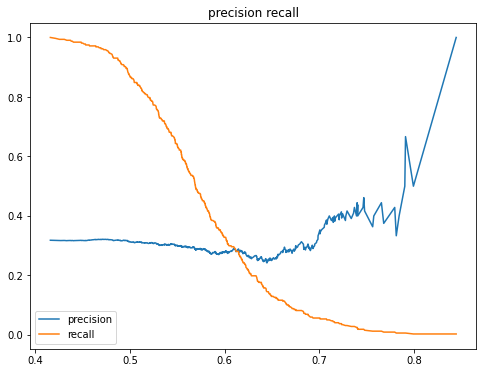

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in long_scalars


acc_pr_bythr : [0.52948886, 0.52455, 0.5271113, 0.5297475, 0.5270071, 0.5356546, 0.537728, 0.53636235, 0.53847384, 0.5384706, 0.5351522, 0.53458536, 0.5352888, 0.53638214, 0.53645504, 0.534827, 0.5400612, 0.53896576, 0.53949726, 0.5397969, 0.53831166, 0.53831965, 0.5397596, 0.54394346, 0.5453191, 0.54600585, 0.54991513, 0.55561376, 0.55424726, 0.556083, 0.55879754, 0.5620987, 0.5655189, 0.5665807, 0.56809926, 0.5682361, 0.56716484, 0.56651604, 0.5733885, 0.5733155, 0.5780577, 0.576888, 0.5779457, 0.57193357, 0.5722707, 0.57249296, 0.5735555, 0.57459515, 0.573644, 0.5758433, 0.57241666, 0.57511973, 0.57465494, 0.5708362, 0.5698538, 0.5772014, 0.5773842, 0.57393587, 0.5761781, 0.5746116, 0.57287353, 0.5698499, 0.5669897, 0.5709151, 0.5712225, 0.56999326, 0.57057697, 0.57259375, 0.572513, 0.573613, 0.5730759, 0.58148044, 0.5814985, 0.5796662, 0.5773862, 0.57680196, 0.5736513, 0.57317847, 0.5721053, 0.57572466, 0.57366973, 0.5766669, 0.5751638, 0.57675797, 0.57482135, 0.5750709, 0.57462853

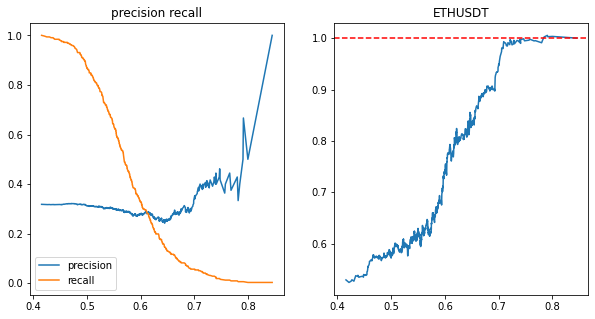

last_index : 11000
len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
pr_thresh : [1.001543]
train_x.shape : (7000, 15, 4, 1)
train_y.shape : (7000, 1)

class_weights : {0: 0.6969334926324173, 1: 1.769464105156724}
test_result.shape : (1000, 2)
test_y[:5] : [0 0 0 0 0]
y_score[:5] : [[0.5922128 ]
 [0.5389969 ]
 [0.49476087]
 [0.58489186]
 [0.6066675 ]]
test_y.shape : (1000, 1)
y_score.shape : (1000, 1)
len(test_y) : 1000


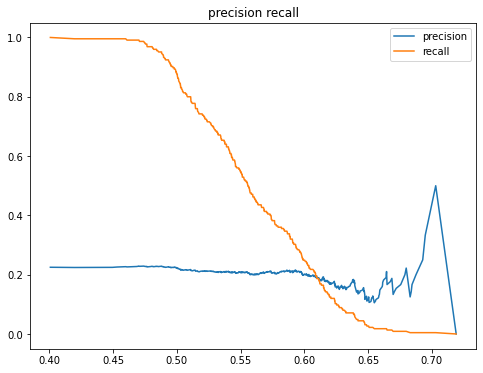

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in long_scalars


acc_pr_bythr : [0.50004655, 0.50100565, 0.50181407, 0.5021366, 0.50322247, 0.5027594, 0.50208735, 0.50679916, 0.5081465, 0.5101058, 0.51204956, 0.513285, 0.5158038, 0.51495594, 0.5141681, 0.5152128, 0.51467806, 0.51469153, 0.5150879, 0.5164378, 0.5175719, 0.51925707, 0.51901555, 0.51825297, 0.5178483, 0.5189155, 0.5167852, 0.51754415, 0.5178361, 0.51873, 0.51571, 0.5188167, 0.51690984, 0.51698315, 0.5149287, 0.5138037, 0.51331973, 0.513919, 0.51666445, 0.5165807, 0.51583785, 0.51591605, 0.5173739, 0.5202071, 0.52107006, 0.5201622, 0.52005273, 0.51908815, 0.52021927, 0.5202504, 0.5215154, 0.52486116, 0.52516156, 0.52614427, 0.5250649, 0.5262314, 0.5269466, 0.5234421, 0.5308222, 0.5328723, 0.5332279, 0.53339726, 0.5345935, 0.5362959, 0.53524905, 0.5323432, 0.531735, 0.52968824, 0.5302596, 0.5289889, 0.52944523, 0.5275087, 0.5273213, 0.5261953, 0.52784115, 0.5297737, 0.5290054, 0.53014284, 0.531996, 0.53266084, 0.5326982, 0.53208673, 0.5298388, 0.5299765, 0.5273712, 0.5314043, 0.5307025, 

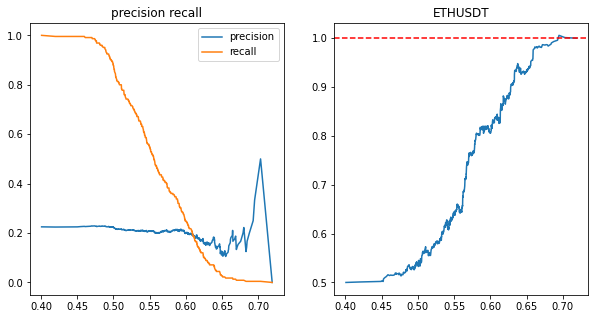

last_index : 12000
len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
pr_thresh : [1.0015132]
train_x.shape : (7000, 15, 4, 1)
train_y.shape : (7000, 1)

class_weights : {0: 0.7015433954700341, 1: 1.74042764793635}
test_result.shape : (1000, 2)
test_y[:5] : [0 0 0 1 0]
y_score[:5] : [[0.552541 ]
 [0.5588207]
 [0.6154003]
 [0.5879229]
 [0.5964847]]
test_y.shape : (1000, 1)
y_score.shape : (1000, 1)
len(test_y) : 1000


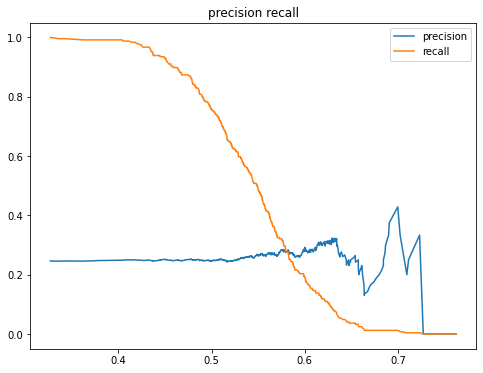

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in long_scalars


acc_pr_bythr : [0.55562055, 0.55820304, 0.5576801, 0.5575999, 0.5560522, 0.55752164, 0.5579426, 0.56019837, 0.56166583, 0.56101066, 0.56329304, 0.5627151, 0.5641895, 0.56465685, 0.56404996, 0.56505454, 0.5653847, 0.5671002, 0.5673962, 0.56520146, 0.56472397, 0.565594, 0.56778055, 0.5723922, 0.5719123, 0.5720444, 0.57394624, 0.5735929, 0.57154465, 0.57239383, 0.57477385, 0.57374465, 0.57451653, 0.5721843, 0.5733062, 0.58035666, 0.5757041, 0.5739488, 0.5757145, 0.5753052, 0.576916, 0.5786198, 0.5783824, 0.5789977, 0.58096975, 0.58330244, 0.580498, 0.57890296, 0.576876, 0.57811934, 0.55373424, 0.5532702, 0.55335546, 0.5527942, 0.550151, 0.54806453, 0.55082357, 0.5528676, 0.55535567, 0.5541285, 0.55396324, 0.5532683, 0.55463815, 0.5600172, 0.5620331, 0.56183386, 0.5627112, 0.5647481, 0.5708162, 0.57452124, 0.5761033, 0.5772291, 0.58030194, 0.5818806, 0.58159614, 0.5800859, 0.581615, 0.58324283, 0.58519536, 0.5856816, 0.58701056, 0.5872322, 0.5876776, 0.58889705, 0.5908588, 0.5910498, 0.590

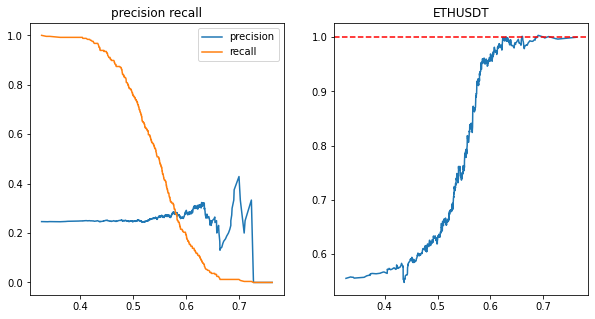

last_index : 13000
len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
pr_thresh : [1.0014651]
train_x.shape : (7000, 15, 4, 1)
train_y.shape : (7000, 1)

class_weights : {0: 0.7070707070707071, 1: 1.7073170731707317}
test_result.shape : (1000, 2)
test_y[:5] : [0 1 1 1 0]
y_score[:5] : [[0.58647364]
 [0.52248174]
 [0.6078593 ]
 [0.5193879 ]
 [0.55402887]]
test_y.shape : (1000, 1)
y_score.shape : (1000, 1)
len(test_y) : 1000


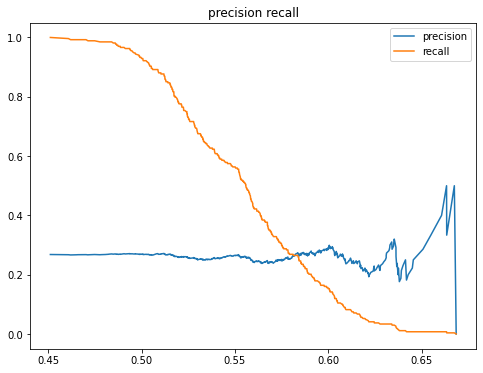

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in long_scalars


acc_pr_bythr : [0.7474109, 0.74556667, 0.7462089, 0.7454406, 0.7470676, 0.7482331, 0.7436271, 0.74709964, 0.74603057, 0.74555206, 0.74721843, 0.7451756, 0.74805665, 0.74921095, 0.74909306, 0.7500224, 0.75082463, 0.7502692, 0.7497666, 0.7610261, 0.76528347, 0.7682964, 0.76528704, 0.7686884, 0.77055824, 0.7763968, 0.7747592, 0.7782887, 0.77404207, 0.77291095, 0.7687851, 0.76876014, 0.769447, 0.77715904, 0.7782773, 0.7771016, 0.77815986, 0.77799416, 0.77873427, 0.7779127, 0.77847844, 0.7789459, 0.7785581, 0.7745775, 0.78276783, 0.785005, 0.7851064, 0.804112, 0.7980824, 0.80053353, 0.7987859, 0.8007172, 0.8003648, 0.80157465, 0.79980266, 0.80253685, 0.80000305, 0.80341303, 0.8035579, 0.80692494, 0.8038584, 0.80310285, 0.806058, 0.804401, 0.7990318, 0.7990461, 0.8011177, 0.7984506, 0.7997963, 0.8009351, 0.8008603, 0.80085176, 0.7995442, 0.7997882, 0.79887235, 0.7926424, 0.793196, 0.79141057, 0.7911874, 0.7945822, 0.79584736, 0.7928415, 0.79428035, 0.7932657, 0.78978074, 0.79025626, 0.795178

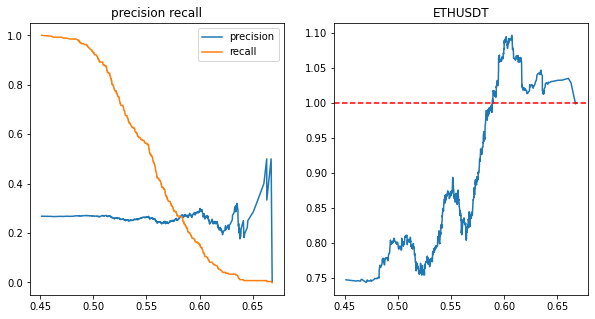

last_index : 14000
len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
pr_thresh : [1.0013518]
train_x.shape : (7000, 15, 4, 1)
train_y.shape : (7000, 1)

class_weights : {0: 0.7144315166360482, 1: 1.6658733936220846}
test_result.shape : (1000, 2)
test_y[:5] : [0 1 0 0 0]
y_score[:5] : [[0.5599008 ]
 [0.53770506]
 [0.6399989 ]
 [0.5549899 ]
 [0.5688525 ]]
test_y.shape : (1000, 1)
y_score.shape : (1000, 1)
len(test_y) : 1000


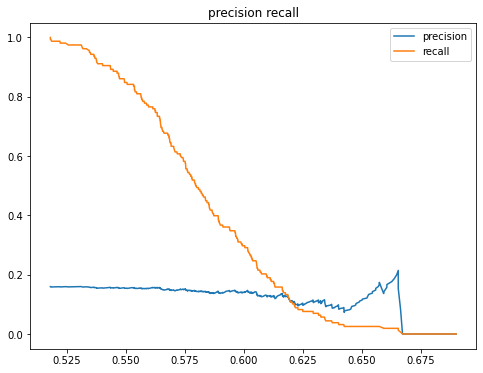

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in long_scalars


acc_pr_bythr : [0.5065931, 0.50709045, 0.5035773, 0.5033599, 0.5026901, 0.5035359, 0.50367326, 0.5038516, 0.5046676, 0.50536627, 0.5044969, 0.5045121, 0.50415015, 0.50455636, 0.5052771, 0.5061545, 0.5068469, 0.50632507, 0.5046548, 0.5048596, 0.50477755, 0.50535005, 0.5054682, 0.5059576, 0.50837934, 0.50837064, 0.50765646, 0.5065039, 0.5110401, 0.51196045, 0.51156104, 0.51222616, 0.5130238, 0.5122015, 0.51074696, 0.51136905, 0.50925714, 0.50981337, 0.50999457, 0.5099075, 0.5128583, 0.51243997, 0.51200134, 0.51373833, 0.51291156, 0.55135655, 0.5484667, 0.5490764, 0.54842865, 0.5463576, 0.5467528, 0.54725844, 0.54614633, 0.54521185, 0.5460642, 0.55071086, 0.55152303, 0.5514677, 0.55223095, 0.5529058, 0.5537632, 0.55416423, 0.55613595, 0.5532377, 0.5572088, 0.5586593, 0.55877477, 0.5583337, 0.5594433, 0.55954826, 0.56033593, 0.5602572, 0.55974334, 0.56199, 0.5631676, 0.5629961, 0.5652948, 0.56527925, 0.56641495, 0.5639998, 0.56336164, 0.56232375, 0.5631242, 0.5637388, 0.56259924, 0.5629857

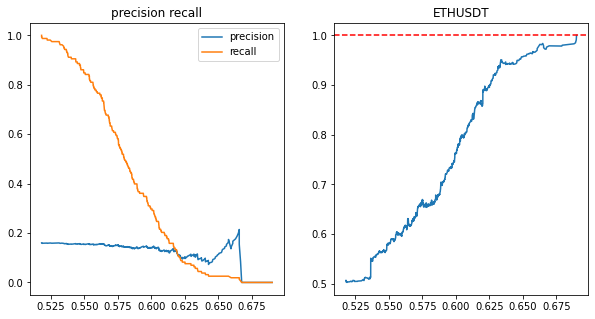

last_index : 15000
len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
pr_thresh : [1.0013398]
train_x.shape : (7000, 15, 4, 1)
train_y.shape : (7000, 1)

class_weights : {0: 0.7128309572301426, 1: 1.674641148325359}
test_result.shape : (1000, 2)
test_y[:5] : [0 0 0 1 0]
y_score[:5] : [[0.6594621 ]
 [0.44762635]
 [0.631925  ]
 [0.5926236 ]
 [0.5223775 ]]
test_y.shape : (1000, 1)
y_score.shape : (1000, 1)
len(test_y) : 1000


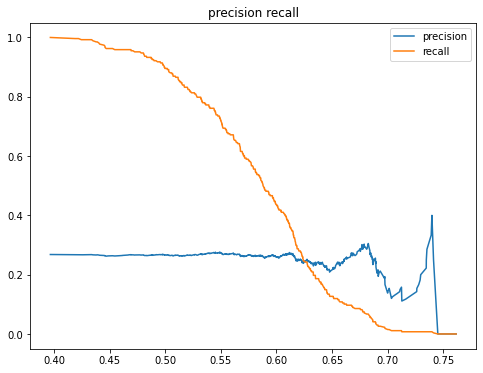

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in long_scalars


acc_pr_bythr : [0.5786626, 0.57949024, 0.57833195, 0.5823936, 0.5820123, 0.5832577, 0.58166826, 0.5724788, 0.5729694, 0.5744246, 0.5739829, 0.5704925, 0.56898, 0.5625094, 0.56163436, 0.5602674, 0.5578693, 0.5597883, 0.56069213, 0.5635732, 0.5632713, 0.5638775, 0.561096, 0.5604975, 0.5604929, 0.5625503, 0.5676767, 0.56769526, 0.58380264, 0.58495957, 0.5964612, 0.5977942, 0.60703427, 0.60923976, 0.6086067, 0.60858756, 0.61112523, 0.61578476, 0.6186899, 0.6177049, 0.61935437, 0.61405784, 0.61410356, 0.6165471, 0.610492, 0.6105436, 0.6119361, 0.61041516, 0.61637783, 0.61353, 0.6080524, 0.6109774, 0.6090284, 0.61013067, 0.61927164, 0.6188318, 0.6197425, 0.61982095, 0.62035227, 0.6206983, 0.62575865, 0.6234718, 0.62731737, 0.62753224, 0.62531537, 0.62468654, 0.62519693, 0.6246046, 0.62422377, 0.6235896, 0.61925673, 0.625825, 0.62941045, 0.63271314, 0.6351306, 0.6374721, 0.6398041, 0.6377051, 0.6391052, 0.649029, 0.65062344, 0.653747, 0.6346797, 0.6361449, 0.6359559, 0.6351948, 0.6335276, 0.6

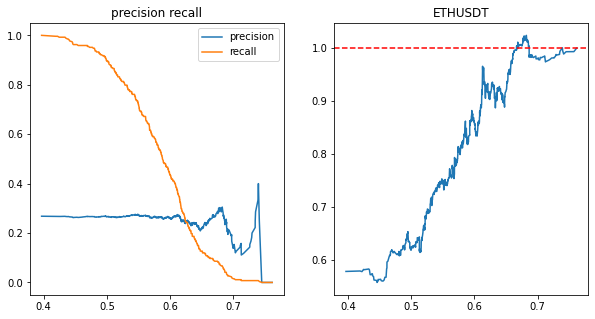

last_index : 16000
len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
pr_thresh : [1.0014153]
train_x.shape : (7000, 15, 4, 1)
train_y.shape : (7000, 1)

class_weights : {0: 0.7057874571486187, 1: 1.7148456638902498}
test_result.shape : (1000, 2)
test_y[:5] : [0 0 0 0 0]
y_score[:5] : [[0.51351523]
 [0.5425705 ]
 [0.5798058 ]
 [0.5782363 ]
 [0.5646034 ]]
test_y.shape : (1000, 1)
y_score.shape : (1000, 1)
len(test_y) : 1000


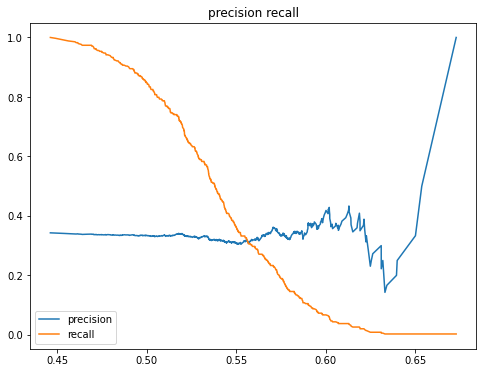

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in long_scalars


acc_pr_bythr : [0.56050074, 0.55891126, 0.5567386, 0.55426127, 0.5530734, 0.55185133, 0.55805147, 0.55765665, 0.55551547, 0.55338, 0.55181915, 0.55274713, 0.5536572, 0.556328, 0.5547644, 0.5561132, 0.5539908, 0.5532766, 0.55235934, 0.5423771, 0.5428462, 0.54381263, 0.54028183, 0.54453874, 0.54136544, 0.5411922, 0.5410811, 0.5401182, 0.5468451, 0.5492215, 0.5385435, 0.5394515, 0.5373718, 0.5401167, 0.5395118, 0.54079705, 0.5360637, 0.530022, 0.5377849, 0.5382915, 0.5390728, 0.5398724, 0.5372519, 0.5265212, 0.5308794, 0.529184, 0.53364253, 0.55059403, 0.55207866, 0.54826283, 0.5501043, 0.5499541, 0.5488892, 0.54779834, 0.54732126, 0.5485181, 0.54459625, 0.546091, 0.5429, 0.54078174, 0.54165787, 0.5414737, 0.5437722, 0.5426188, 0.54238206, 0.5454564, 0.537817, 0.5377034, 0.5395699, 0.5401205, 0.5418337, 0.52635366, 0.52693665, 0.52645355, 0.5302473, 0.5302817, 0.5282779, 0.52838343, 0.5275636, 0.5278392, 0.52603036, 0.524109, 0.52497995, 0.5250041, 0.52844477, 0.5303617, 0.53291243, 0.534

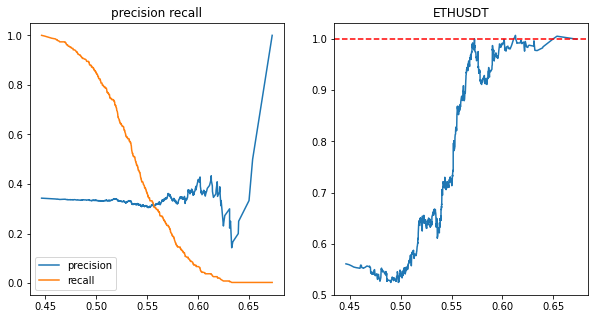

last_index : 17000
len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
pr_thresh : [1.0012779]
train_x.shape : (7000, 15, 4, 1)
train_y.shape : (7000, 1)

class_weights : {0: 0.6903353057199211, 1: 1.8134715025906736}
test_result.shape : (1000, 2)
test_y[:5] : [0 0 0 0 0]
y_score[:5] : [[0.5813481 ]
 [0.6216483 ]
 [0.666453  ]
 [0.5764857 ]
 [0.59891975]]
test_y.shape : (1000, 1)
y_score.shape : (1000, 1)
len(test_y) : 1000


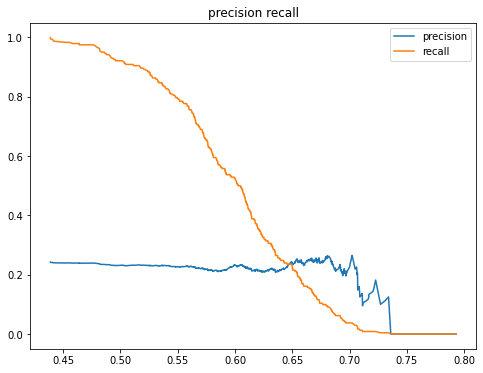

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in long_scalars


acc_pr_bythr : [0.5759948, 0.5747898, 0.5735297, 0.5727071, 0.57335675, 0.5728194, 0.57188374, 0.57190686, 0.57311916, 0.5719693, 0.5714225, 0.57245564, 0.57159144, 0.56993186, 0.5674804, 0.56481564, 0.56336856, 0.56146663, 0.5620515, 0.5588347, 0.55849814, 0.55688846, 0.55843025, 0.55976015, 0.558711, 0.5577295, 0.55697364, 0.55703044, 0.5550409, 0.55479234, 0.55415356, 0.54966754, 0.5503084, 0.55124867, 0.55113953, 0.5521893, 0.55218786, 0.5526505, 0.5518651, 0.5510902, 0.5520235, 0.5512891, 0.55185103, 0.55200535, 0.5516601, 0.55269873, 0.5569466, 0.55828255, 0.55910385, 0.55854625, 0.5591134, 0.5601919, 0.555638, 0.55665743, 0.56636906, 0.5681514, 0.5685363, 0.5678434, 0.5689656, 0.5704399, 0.56951356, 0.56786877, 0.5683955, 0.5681544, 0.5689531, 0.5678874, 0.56795543, 0.57065123, 0.5685645, 0.5685019, 0.5666968, 0.56730413, 0.56760377, 0.5682821, 0.5688559, 0.5662092, 0.56832856, 0.5686077, 0.5652632, 0.5636198, 0.565169, 0.56542426, 0.56471, 0.56536114, 0.56725764, 0.5656679, 0.5

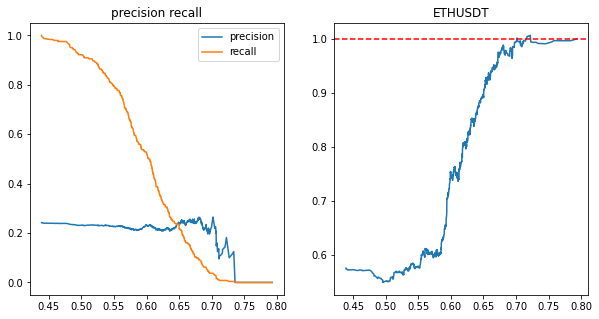

last_index : 18000
len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
pr_thresh : [1.0011432]
train_x.shape : (7000, 15, 4, 1)
train_y.shape : (7000, 1)

class_weights : {0: 0.6998600279944012, 1: 1.7508754377188593}
test_result.shape : (1000, 2)
test_y[:5] : [0 0 0 0 0]
y_score[:5] : [[0.685887  ]
 [0.57634974]
 [0.5897145 ]
 [0.5710329 ]
 [0.5152434 ]]
test_y.shape : (1000, 1)
y_score.shape : (1000, 1)
len(test_y) : 1000


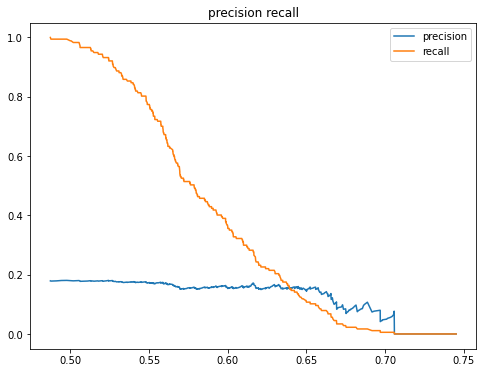

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:201: RuntimeWarning: invalid value encountered in long_scalars


acc_pr_bythr : [0.5732661, 0.57453537, 0.574855, 0.57542956, 0.5767073, 0.57846117, 0.57873356, 0.57819885, 0.5796234, 0.5804076, 0.5812948, 0.580926, 0.5824085, 0.58278227, 0.5818322, 0.58234966, 0.5810731, 0.58234996, 0.5824842, 0.58416677, 0.5848259, 0.5857322, 0.5818366, 0.5806604, 0.57989633, 0.581465, 0.58138186, 0.5810312, 0.58334434, 0.583847, 0.5833961, 0.58416307, 0.58516055, 0.5845584, 0.58483106, 0.58438003, 0.5835314, 0.5847658, 0.5839108, 0.5846472, 0.5909571, 0.5915213, 0.5926331, 0.5915939, 0.591578, 0.5920233, 0.5926516, 0.59227353, 0.5918215, 0.5919734, 0.5906249, 0.59067374, 0.59211475, 0.5931238, 0.5936507, 0.59466016, 0.5943304, 0.59468806, 0.5930512, 0.5935122, 0.5923551, 0.5948679, 0.59633064, 0.60065424, 0.6009089, 0.6008786, 0.6019191, 0.60125875, 0.60203993, 0.60326654, 0.60313785, 0.6044059, 0.60435414, 0.6042975, 0.60102177, 0.6025447, 0.6004916, 0.6013869, 0.60261524, 0.60289776, 0.6023776, 0.60234827, 0.6021624, 0.6024709, 0.6000742, 0.59822965, 0.6000497,

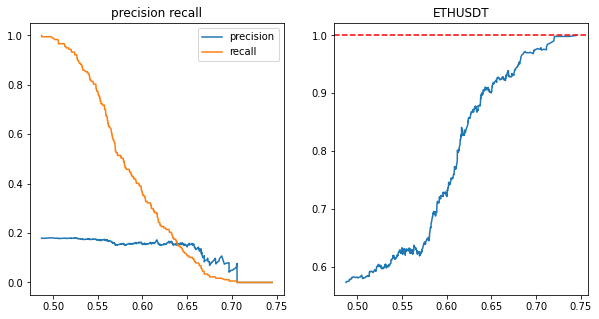

last_index : 19000
len(train_x) : 7000
len(val_x) : 2000
len(test_x) : 1000
pr_thresh : [1.0010444]
train_x.shape : (7000, 15, 4, 1)
train_y.shape : (7000, 1)

class_weights : {0: 0.7192766132346897, 1: 1.640112464854733}


KeyboardInterrupt: ignored

In [19]:
#         1. data slicing      #
tvt_size = 10000
shift_size = int(tvt_size * 0.1)
shift_i = 0

#         2. calc, iteration number     #
# data_len = len(data_x)


while 1:

  # if shift_i == 1:
  #   pass
  # else:
  #   shift_i += 1
  #   continue

  last_index = tvt_size + shift_size * shift_i
  print("last_index :", last_index)
  # print("last_index :", last_index)

  slice_x = data_x[shift_size * shift_i :last_index]
  
  #   reshape to 3d   #
  slice_x = slice_x.reshape(-1, slice_x.shape[1], slice_x.shape[2], 1)

  slice_labels = data_labels[shift_size * shift_i :last_index].reshape(-1, 1)

  if last_index > len(data_x):
    break

  else:
    shift_i += 1


  train_x = slice_x[:int(tvt_size * 0.7)]
  val_x = slice_x[int(tvt_size * 0.7):int(tvt_size * 0.9)]
  test_x = slice_x[int(tvt_size * 0.9):]

  print("len(train_x) :", len(train_x))
  print("len(val_x) :", len(val_x))
  print("len(test_x) :", len(test_x))

  train_labels = slice_labels[:int(tvt_size * 0.7)]
  val_labels = slice_labels[int(tvt_size * 0.7):int(tvt_size * 0.9)]
  test_labels = slice_labels[int(tvt_size * 0.9):]

  sorted_pr = sorted(slice_labels, reverse=True)
  pct = 0.28
  len_pct = int(len(slice_labels) * pct)
  pr_thresh = sorted_pr[len_pct]
  print("pr_thresh :", pr_thresh)

  # pr_thresh = 1

  train_y = np.where(train_labels > pr_thresh, 1, 0)
  val_y = np.where(val_labels > pr_thresh, 1, 0)
  test_y = np.where(test_labels > pr_thresh, 1, 0)
  
  from tensorflow.keras import utils

  train_y_ohe = utils.to_categorical(train_y, 2)
  val_y_ohe = utils.to_categorical(val_y, 2)
  test_y_ohe = utils.to_categorical(test_y, 2)

  # train_y = train_labels[:, :, [target_label_index]]
  # val_y = val_labels[:, :, [target_label_index]]
  # test_y = test_labels[:, :, [target_label_index]]

  # print("train_labels.shape :", train_labels.shape)
  print("train_x.shape :", train_x.shape)
  print("train_y.shape :", train_y.shape)
  print()

  from sklearn.utils import class_weight

  label = train_y.reshape(-1, )
  class_weights = class_weight.compute_class_weight('balanced', 
                                                      classes=np.unique(label),
                                                      y=label)
  class_weights = dict(enumerate(class_weights))
  print('class_weights :', class_weights)

  from tensorflow.keras.preprocessing.image import ImageDataGenerator 

  datagen = ImageDataGenerator( 
      # rotation_range = 45,
      # zoom_range = 0.5,
      # shear_range = 0.5,
      # horizontal_flip = True,
      # vertical_flip = True,
      # width_shift_range=0.5,
      # height_shift_range=0.5,
      # fill_mode = 'nearest'
      )

  valgen = ImageDataGenerator( 
      )

  datagen.fit(train_x)
  valgen.fit(val_x)
  batch_size = 128

  # train_flow = datagen.flow(train_x, train_y, batch_size=batch_size) 
  # val_flow = valgen.flow(val_x, val_y, batch_size=batch_size) 
  
  train_flow = datagen.flow(train_x, train_y_ohe, batch_size=batch_size) 
  val_flow = valgen.flow(val_x, val_y_ohe, batch_size=batch_size) 



  #         train         #
  pair_name = key.split(".")[0].split(" ")[1]

  # model_name = 'inner_tick_cnn_lscalemm_%s_%s_%s_%s.h5' % (pair_name, input_size, label_size, last_index)
  # model_name = 'inner_tick_cnn_lscalemm_postfee_%s_%s_%s_%s.h5' % (pair_name, input_size, label_size, last_index)
  model_name = 'inner_tick_cnn_lscalemm_postfee_pct_%s_%s_%s_%s_%s.h5' % (pct* 1000, pair_name, input_size, label_size, last_index)
  # break

  # model = cnn2d_model(train_x.shape[1:])
  # history = compile_and_fit(model, model_name, train_flow, val_flow, class_weight=class_weights)
  
  # break
  model = tf.keras.models.load_model(ckpt_path + model_name)

  test_result = model.predict(test_x)
  print('test_result.shape :', test_result.shape)
  # print('pr_val.shape :', pr_val.shape)

  y_score = test_result[:, [1]]
  # y_score = test_result[:, [0]]
  print('test_y[:5] :', test_y.reshape(-1,)[:5])
  # print('np.unique(test_y) :', np.unique(test_y, return_counts=True))
  print('y_score[:5] :', y_score[:5])
  # print('np.unique(y_score) :', np.unique(y_score, return_counts=True))

  print('test_y.shape :', test_y.shape)
  print('y_score.shape :', y_score.shape)

  print('len(test_y) :', len(test_y))

  from sklearn.metrics import precision_recall_curve

  #     precision recall curve   #
  precision, recall, threshold = precision_recall_curve(test_y, y_score)
  precision, recall = precision[:-1], recall[:-1]

  plt.plot(threshold, precision, label='precision')
  plt.plot(threshold, recall, label='recall')
  plt.legend()
  plt.title('precision recall')
  plt.show()
  # print(y_pred)


  lvrg = 1
  fee = 0.0006


  # threshold = [0.65]
  # print('threshold :', threshold)
  # break

  acc_pr_bythr = []
  new_thresh = []

  for thresh in threshold:
    
    # if thresh < 0.5:
    #     continue

    y_pred = np.where(y_score[:, -1] > thresh, 1, 0)
    # print('y_pred.shape :', y_pred.shape)
    # print('y_pred :', y_pred)

    #     compare precision     #

    # print('precision :', precision_score(test_y, y_pred))
    # print('recall :', recall_score(test_y, y_pred))
    # print()

    # print('np.isnan(np.sum(x_test)) :', np.isnan(np.sum(x_test)))
    # print('np.isnan(np.sum(test_y)) :', np.isnan(np.sum(test_y)))

    # # plot_confusion_matrix(best_model, x_test, test_y, normalize=None)
    # # plt.show()  
    # print()

    from sklearn.metrics import confusion_matrix

    #     check win-ratio improvement     #
    cmat = confusion_matrix(test_y, y_pred)
    # print(cmat)
    # print(np.sum(cmat, axis=1))

    test_size = len(test_y)
    test_pr_list = test_labels
    # print('origin ac_pr :', np.cumprod(test_pr_list)[-1])

    org_wr = np.sum(cmat, axis=1)[-1] / sum(np.sum(cmat, axis=1))
    ml_wr = cmat[1][1] / np.sum(cmat, axis=0)[-1]
    # print('win ratio improvement %.2f --> %.2f' % (org_wr, ml_wr))

    # print('pr_test.shape :', pr_test.shape)

    # print(y_pred)
    # print(test_pr_list)

    pred_pr_list = np.where(y_pred == 1, test_pr_list.reshape(-1, ), 1)
    # print("pred_pr_list[:10] :", pred_pr_list[:10])

    #       after fee adjustment    #
    # pred_pr_list = (pred_pr_list - 1 - fee) * lvrg + 1

    # pred_pr_list = np.where(np.isnan(pred_pr_list), 1.0, pred_pr_list)
    # pred_pr_list = np.where(pred_pr_list == 0.0, 1.0, pred_pr_list)
    # print('pred_pr_list.shape :', pred_pr_list.shape)

    # if np.cumprod(test_pr_list)[-1] < np.cumprod(pred_pr_list)[-1]:
    #   print('accum_pr increased ! : %.3f --> %.3f' % (np.cumprod(test_pr_list)[-1], np.cumprod(pred_pr_list)[-1]))
    #   print('thresh :', thresh)
      
    # if len(threshold) == 1:
  #   plt.figure(figsize=(10, 5))
  #   plt.subplot(121)
  #   plt.plot(np.cumprod(test_pr_list))
  #   plt.title('%.3f' % (np.cumprod(test_pr_list)[-1]))
  # # plt.show()

  #   plt.subplot(122)
  #   plt.plot(np.cumprod(pred_pr_list))
  #   plt.title('%.3f' % (np.cumprod(pred_pr_list)[-1]))
  #   # plt.axvline(len(org_pr_test), linestyle='--', color='r')
  #   plt.show()


    acc_pr_bythr.append(np.cumprod(pred_pr_list)[-1])
    new_thresh.append(thresh)


  print('acc_pr_bythr :', acc_pr_bythr)

  plt.figure(figsize=(10, 5))
  plt.subplot(121)
  plt.plot(threshold, precision, label='precision')
  plt.plot(threshold, recall, label='recall')
  plt.legend()
  plt.title('precision recall')
  # plt.show()
  plt.subplot(122)
  plt.plot(new_thresh, acc_pr_bythr)
  plt.axhline(1, linestyle='--', color='r')
  plt.title(pair_name)
  plt.show()



test_result.shape : (1000, 2)
test_y[:5] : [1 1 0 1 1]
y_score[:5] : [[0.59851015]
 [0.5583208 ]
 [0.53827363]
 [0.518443  ]
 [0.5684612 ]]
test_y.shape : (1000, 1)
y_score.shape : (1000, 1)
len(test_y) : 1000


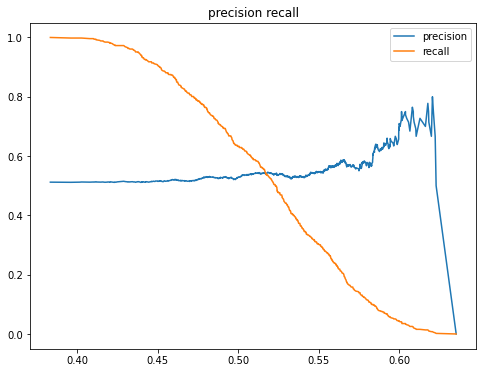

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in long_scalars


acc_pr_bythr : [1.1487672, 1.1494385, 1.1521839, 1.1486942, 1.151534, 1.1512587, 1.1523517, 1.1523517, 1.1518127, 1.1466084, 1.1454074, 1.1457785, 1.1458771, 1.144492, 1.144316, 1.1453778, 1.1490434, 1.14871, 1.1484518, 1.1501126, 1.1554043, 1.1508718, 1.1467392, 1.1436248, 1.1437207, 1.1459013, 1.1457567, 1.1461539, 1.1518061, 1.1529032, 1.1552345, 1.1571085, 1.1608965, 1.1586763, 1.1577771, 1.1562116, 1.1475768, 1.1454774, 1.1549346, 1.154047, 1.1576408, 1.1617802, 1.1587021, 1.1553555, 1.1559223, 1.1501398, 1.1470367, 1.1455214, 1.1456032, 1.151642, 1.1530368, 1.153543, 1.1534256, 1.1553012, 1.1489844, 1.1438818, 1.1369542, 1.1329733, 1.1293766, 1.1320257, 1.1335334, 1.1337684, 1.1369957, 1.1336393, 1.1332431, 1.1347437, 1.1324328, 1.137591, 1.1361958, 1.1363397, 1.1382384, 1.1317403, 1.1302236, 1.1281976, 1.1294109, 1.1307838, 1.1238064, 1.1272403, 1.12924, 1.1252916, 1.1239698, 1.112893, 1.1163263, 1.1174335, 1.1207458, 1.1208044, 1.1226363, 1.1125039, 1.1092093, 1.1140516, 1.1164

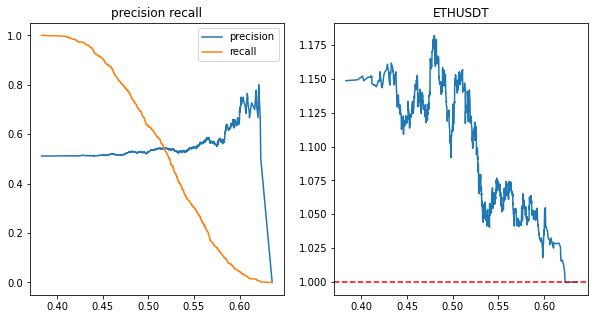

In [ ]:
model = tf.keras.models.load_model(ckpt_path + model_name)

test_result = model.predict(test_x)
print('test_result.shape :', test_result.shape)
# print('pr_val.shape :', pr_val.shape)

y_score = test_result[:, [1]]
# y_score = test_result[:, [0]]
print('test_y[:5] :', test_y.reshape(-1,)[:5])
# print('np.unique(test_y) :', np.unique(test_y, return_counts=True))
print('y_score[:5] :', y_score[:5])
# print('np.unique(y_score) :', np.unique(y_score, return_counts=True))

print('test_y.shape :', test_y.shape)
print('y_score.shape :', y_score.shape)

print('len(test_y) :', len(test_y))

from sklearn.metrics import precision_recall_curve

#     precision recall curve   #
precision, recall, threshold = precision_recall_curve(test_y, y_score)
precision, recall = precision[:-1], recall[:-1]

plt.plot(threshold, precision, label='precision')
plt.plot(threshold, recall, label='recall')
plt.legend()
plt.title('precision recall')
plt.show()
# print(y_pred)


# threshold = [0.65]
# print('threshold :', threshold)
# break

acc_pr_bythr = []
new_thresh = []

for thresh in threshold:
  
  # if thresh < 0.5:
  #     continue

  y_pred = np.where(y_score[:, -1] > thresh, 1, 0)
  # print('y_pred.shape :', y_pred.shape)
  # print('y_pred :', y_pred)

  #     compare precision     #

  # print('precision :', precision_score(test_y, y_pred))
  # print('recall :', recall_score(test_y, y_pred))
  # print()

  # print('np.isnan(np.sum(x_test)) :', np.isnan(np.sum(x_test)))
  # print('np.isnan(np.sum(test_y)) :', np.isnan(np.sum(test_y)))

  # # plot_confusion_matrix(best_model, x_test, test_y, normalize=None)
  # # plt.show()  
  # print()

  from sklearn.metrics import confusion_matrix

  #     check win-ratio improvement     #
  cmat = confusion_matrix(test_y, y_pred)
  # print(cmat)
  # print(np.sum(cmat, axis=1))

  test_size = len(test_y)
  test_pr_list = test_labels
  # print('origin ac_pr :', np.cumprod(test_pr_list)[-1])

  org_wr = np.sum(cmat, axis=1)[-1] / sum(np.sum(cmat, axis=1))
  ml_wr = cmat[1][1] / np.sum(cmat, axis=0)[-1]
  # print('win ratio improvement %.2f --> %.2f' % (org_wr, ml_wr))

  # print('pr_test.shape :', pr_test.shape)

  # print(y_pred)
  # print(test_pr_list)

  pred_pr_list = np.where(y_pred == 1, test_pr_list.reshape(-1, ), 1)
  # pred_pr_list = np.where(np.isnan(pred_pr_list), 1.0, pred_pr_list)
  # pred_pr_list = np.where(pred_pr_list == 0.0, 1.0, pred_pr_list)
  # print('pred_pr_list.shape :', pred_pr_list.shape)

  # if np.cumprod(test_pr_list)[-1] < np.cumprod(pred_pr_list)[-1]:
  #   print('accum_pr increased ! : %.3f --> %.3f' % (np.cumprod(test_pr_list)[-1], np.cumprod(pred_pr_list)[-1]))
  #   print('thresh :', thresh)
    
  # if len(threshold) == 1:
#   plt.figure(figsize=(10, 5))
#   plt.subplot(121)
#   plt.plot(np.cumprod(test_pr_list))
#   plt.title('%.3f' % (np.cumprod(test_pr_list)[-1]))
# # plt.show()

#   plt.subplot(122)
#   plt.plot(np.cumprod(pred_pr_list))
#   plt.title('%.3f' % (np.cumprod(pred_pr_list)[-1]))
#   # plt.axvline(len(org_pr_test), linestyle='--', color='r')
#   plt.show()


  acc_pr_bythr.append(np.cumprod(pred_pr_list)[-1])
  new_thresh.append(thresh)


print('acc_pr_bythr :', acc_pr_bythr)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(threshold, precision, label='precision')
plt.plot(threshold, recall, label='recall')
plt.legend()
plt.title('precision recall')
# plt.show()
plt.subplot(122)
plt.plot(new_thresh, acc_pr_bythr)
plt.axhline(1, linestyle='--', color='r')
plt.title(pair_name)
plt.show()

#### find best_thr

Text(0.5, 1.0, '0.013460000000000034')

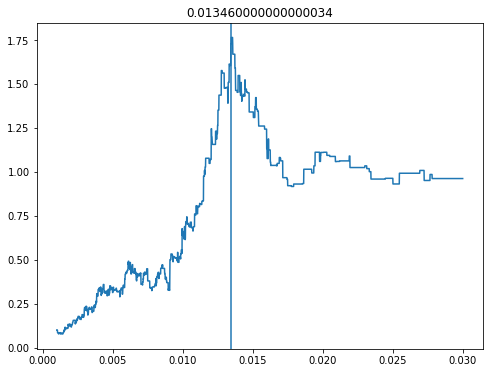

In [ ]:

model = tf.keras.models.load_model(ckpt_path + model_name)
test_result = model.predict(test_x)

pred_y = test_result
# pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
thresh_pr_list = []

# plotting = True
plotting = False

# pr_plot = True
pr_plot = False

thresh = 0.015
# thresh = -0.001

thresh_list = np.arange(0.001, 0.03, 1e-5)


#       find best thresh        #
for thresh in tqdm(thresh_list):

  pr_list = []
  i = 0
  while 1:
  # for i in range(len(test_y)):

    try:
      input = test_x[i, :, target_label_index]
    except:
      input = test_x[i, :, 0]


    label = test_y[i]
    pred = pred_y[i]

    # print("label.shape :", label.shape)
    # print("len(label) :", len(label))
    # print("shift_size :", shift_size)
    # break

    # input_close = test_slice_close_x[i, :, :]
    # # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
    # close = test_slice_label_close_x[i, :, :]

    #     find highest / lowest arg     #
    # high_arg = np.argmax(pred)
    # low_arg = np.argmin(pred)

    #     we always sell high, buy low    #
    label_pr = label[-1]
    pred_pr = pred[-1]

    if plotting:

      # if pred_pr > thresh:

        # plt.subplot(211)
        # plt.plot(np.arange(len(input_close)), input_close)
        # plt.plot(np.arange(len(close)) + input_size, close)
        # plt.axvline(high_arg + input_size)
        # plt.axvline(low_arg + input_size)

        # plt.subplot(212)
        # plt.plot(np.arange(len(input)), input,
        #         label='Inputs', marker='.', zorder=-10)    
        # plt.scatter(np.arange(len(label)), label,
        #           edgecolors='k', label='Labels', c='#2ca02c', s=64)
        # plt.scatter(np.arange(len(pred)), pred,
        #             marker='X', edgecolors='k', label='Predictions',
        #             c='#ff7f0e', s=64)

        plt.plot(label)
        plt.plot(pred)
        
        plt.axhline(thresh)
        # plt.plot(pred)
        # plt.plot(label)
        # plt.axvline(high_arg + input_size)
        # plt.axvline(low_arg + input_size)


        # plt.suptitle("%.3f" % pr)
        plt.show()

    calc_label_pr = (label_pr - fee) * lvrg + 1
    calc_pred_pr = (pred_pr - fee) * lvrg + 1

    if calc_pred_pr > thresh + 1:
      pr_list.append(calc_label_pr)
      # print("label_pr :", label_pr)

    #     i should moved to end of trading index    #
    #     long    #
    # if high_arg > low_arg:
    #   i += high_arg
    # else:
    #   i += low_arg

    i += 1

    # print("i :", i)

    if i >= len(test_y):
      break
    # else:
    #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

    #     shift, if trade complished    #

  if pr_plot:
    np_pr_list = np.array(pr_list)
    wr = len(np_pr_list[np_pr_list > 1]) / len(np_pr_list[np_pr_list != 1]) 

    plt.plot(np.cumprod(pr_list))
    plt.title("%s\nwr : %.3f" % (key, wr))
    plt.show()

  thresh_pr_list.append(np.cumprod(pr_list)[-1])

best_thr = thresh_list[np.argmax(thresh_pr_list)]
plt.plot(thresh_list, thresh_pr_list)
plt.axvline(best_thr)
plt.title(best_thr)

#### val_thr on test_set

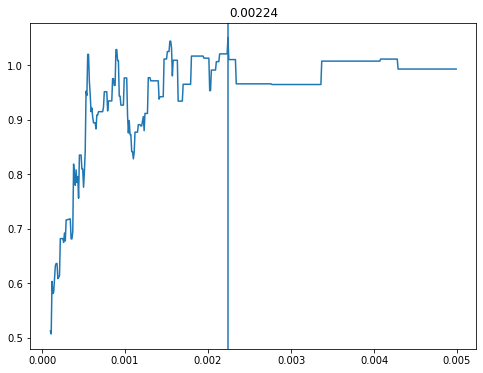

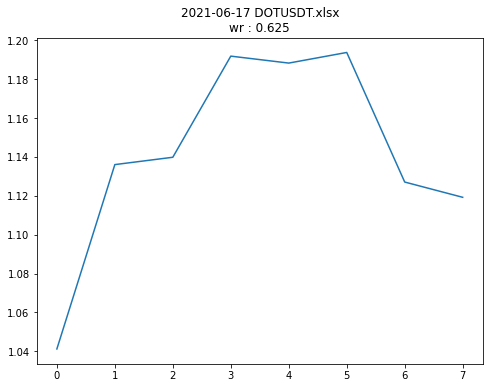

0.00224

In [ ]:

model = tf.keras.models.load_model(ckpt_path + model_name)
val_result = model.predict(val_x)
test_result = model.predict(test_x)

# pred_y = test_result
# pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
thresh_pr_list = []


# thresh = 0.015
# thresh = -0.001

thresh_list = np.arange(0.0001, 0.005, 1e-5)

val_best_thr = get_best_thr(thresh_list, val_x, val_result)

get_best_thr([val_best_thr], test_x, test_result, pr_plot=True)


#### train_thresh

In [ ]:

model = tf.keras.models.load_model(ckpt_path + model_name)
train_result = model.predict(train_x)
train_best_thr = get_best_thr(thresh_list, train_x, train_result)


### multi step - models

In [ ]:
MAX_EPOCHS = 100
MAX_EPOCHS = 200
# MAX_EPOCHS = 50

patience = MAX_EPOCHS // 5
# patience = 2

ckpt_path = current_path + 'ckpt/'

def compile_and_fit(model, model_name, train_x, train_y, val_x, val_y, patience=patience):

  tf.keras.backend.clear_session()

  checkpoint = tf.keras.callbacks.ModelCheckpoint(ckpt_path + model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                # optimizer=tf.optimizers.Adam(learning_rate=1e-4, decay=1e-5),
                optimizer=tf.optimizers.Adam(learning_rate=1e-3, decay=1e-4),
                metrics=[tf.metrics.MeanAbsoluteError()])
  

  history = model.fit(train_x, train_y, epochs=MAX_EPOCHS,
                      validation_data=(val_x, val_y),
                      callbacks=[checkpoint, early_stopping],
                      # callbacks=[early_stopping],
                      batch_size=32)
  return history

#### cnn

In [ ]:
# CONV_WIDTH = 12
CONV_WIDTH = input_size

multi_conv_model = tf.keras.Sequential([
      # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
      tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
      # Shape => [batch, 1, conv_units]
      tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
      # tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(3)),
      # Shape => [batch, 1,  out_steps*features]
      tf.keras.layers.Dense(label_size*num_features,
                            kernel_initializer=tf.initializers.zeros()),
      # Shape => [batch, label_size, features]
      tf.keras.layers.Reshape([label_size, num_features])
  ])

def conv_model():

  # CONV_WIDTH = 3
  # CONV_WIDTH = input_size
  multi_conv_model = tf.keras.Sequential([
      # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
      tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
      # Shape => [batch, 1, conv_units]
      tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
      # tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(3)),
      # Shape => [batch, 1,  out_steps*features]
      tf.keras.layers.Dense(label_size*num_features,
                            kernel_initializer=tf.initializers.zeros()),
      # Shape => [batch, label_size, features]
      tf.keras.layers.Reshape([label_size, num_features])
  ])

  return multi_conv_model


last_index : 15000
len(train_x) : 10500
len(val_x) : 3000
len(test_x) : 1500
test_slice_close_x.shape : (1500, 96, 1)
test_slice_label_close_x.shape : (1500, 24, 1)
train_labels.shape : (10500, 24, 12)
train_y.shape : (10500, 24, 1)

Epoch 1/200
329/329 [==============================] - 2s 4ms/step - loss: 0.6200 - mean_absolute_error: 0.6048 - val_loss: 1.5223 - val_mean_absolute_error: 0.9462

Epoch 00001: val_loss improved from inf to 1.52234, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_15000.h5
Epoch 2/200
329/329 [==============================] - 1s 4ms/step - loss: 0.6035 - mean_absolute_error: 0.5966 - val_loss: 1.5342 - val_mean_absolute_error: 0.9411

Epoch 00002: val_loss did not improve from 1.52234
Epoch 3/200
329/329 [==============================] - 1s 3ms/step - loss: 0.5976 - mean_absolute_error: 0.5942 - val_loss: 1.5342 - val_mean_absolute_error: 0.9441

Epoch 00003: va

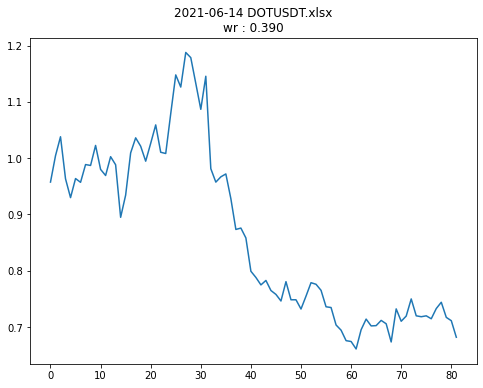

last_index : 16500
len(train_x) : 10500
len(val_x) : 3000
len(test_x) : 1500
test_slice_close_x.shape : (1500, 96, 1)
test_slice_label_close_x.shape : (1500, 24, 1)
train_labels.shape : (10500, 24, 12)
train_y.shape : (10500, 24, 1)

Epoch 1/200
329/329 [==============================] - 2s 4ms/step - loss: 0.6580 - mean_absolute_error: 0.6122 - val_loss: 1.5797 - val_mean_absolute_error: 0.9597

Epoch 00001: val_loss improved from inf to 1.57966, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_16500.h5
Epoch 2/200
329/329 [==============================] - 1s 3ms/step - loss: 0.6190 - mean_absolute_error: 0.6003 - val_loss: 1.5565 - val_mean_absolute_error: 0.9505

Epoch 00002: val_loss improved from 1.57966 to 1.55645, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_16500.h5
Epoch 3/200
329/329 [=====

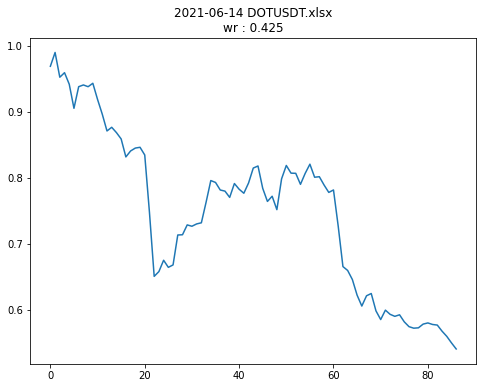

last_index : 18000
len(train_x) : 10500
len(val_x) : 3000
len(test_x) : 1500
test_slice_close_x.shape : (1500, 96, 1)
test_slice_label_close_x.shape : (1500, 24, 1)
train_labels.shape : (10500, 24, 12)
train_y.shape : (10500, 24, 1)

Epoch 1/200
329/329 [==============================] - 2s 4ms/step - loss: 0.6658 - mean_absolute_error: 0.6138 - val_loss: 1.7917 - val_mean_absolute_error: 0.9879

Epoch 00001: val_loss improved from inf to 1.79175, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_18000.h5
Epoch 2/200
329/329 [==============================] - 1s 4ms/step - loss: 0.6233 - mean_absolute_error: 0.5991 - val_loss: 1.7894 - val_mean_absolute_error: 0.9837

Epoch 00002: val_loss improved from 1.79175 to 1.78945, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_18000.h5
Epoch 3/200
329/329 [=====

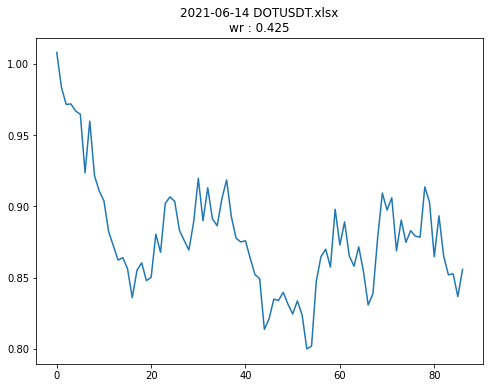

last_index : 19500
len(train_x) : 10500
len(val_x) : 3000
len(test_x) : 1500
test_slice_close_x.shape : (1500, 96, 1)
test_slice_label_close_x.shape : (1500, 24, 1)
train_labels.shape : (10500, 24, 12)
train_y.shape : (10500, 24, 1)

Epoch 1/200
329/329 [==============================] - 2s 4ms/step - loss: 0.6614 - mean_absolute_error: 0.6175 - val_loss: 1.9797 - val_mean_absolute_error: 1.0303

Epoch 00001: val_loss improved from inf to 1.97969, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_19500.h5
Epoch 2/200
329/329 [==============================] - 1s 4ms/step - loss: 0.6165 - mean_absolute_error: 0.6010 - val_loss: 1.8933 - val_mean_absolute_error: 1.0019

Epoch 00002: val_loss improved from 1.97969 to 1.89333, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_19500.h5
Epoch 3/200
329/329 [=====

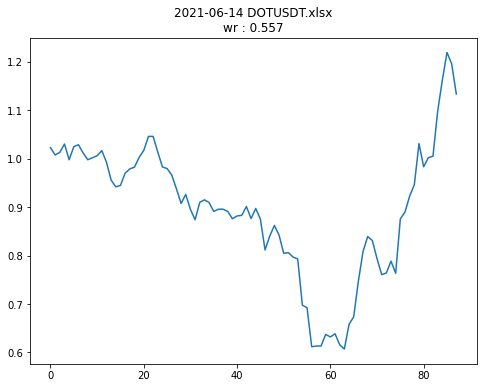

last_index : 21000
len(train_x) : 10500
len(val_x) : 3000
len(test_x) : 1500
test_slice_close_x.shape : (1500, 96, 1)
test_slice_label_close_x.shape : (1500, 24, 1)
train_labels.shape : (10500, 24, 12)
train_y.shape : (10500, 24, 1)

Epoch 1/200
329/329 [==============================] - 2s 4ms/step - loss: 0.7117 - mean_absolute_error: 0.6226 - val_loss: 2.1830 - val_mean_absolute_error: 1.0790

Epoch 00001: val_loss improved from inf to 2.18301, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_21000.h5
Epoch 2/200
329/329 [==============================] - 1s 4ms/step - loss: 0.6687 - mean_absolute_error: 0.6108 - val_loss: 2.0526 - val_mean_absolute_error: 1.0406

Epoch 00002: val_loss improved from 2.18301 to 2.05261, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_21000.h5
Epoch 3/200
329/329 [=====

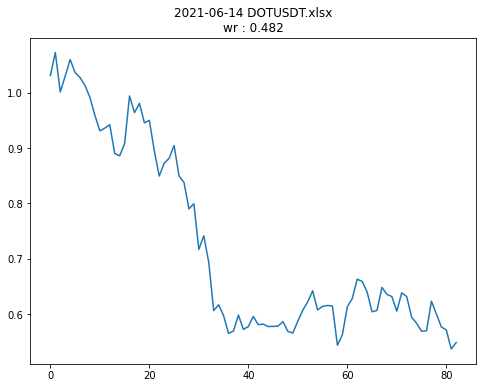

last_index : 22500
len(train_x) : 10500
len(val_x) : 3000
len(test_x) : 1500
test_slice_close_x.shape : (1500, 96, 1)
test_slice_label_close_x.shape : (1500, 24, 1)
train_labels.shape : (10500, 24, 12)
train_y.shape : (10500, 24, 1)

Epoch 1/200
329/329 [==============================] - 2s 6ms/step - loss: 0.7228 - mean_absolute_error: 0.6310 - val_loss: 2.1672 - val_mean_absolute_error: 1.0837

Epoch 00001: val_loss improved from inf to 2.16719, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_22500.h5
Epoch 2/200
329/329 [==============================] - 1s 4ms/step - loss: 0.6732 - mean_absolute_error: 0.6161 - val_loss: 2.0948 - val_mean_absolute_error: 1.0574

Epoch 00002: val_loss improved from 2.16719 to 2.09482, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_22500.h5
Epoch 3/200
329/329 [=====

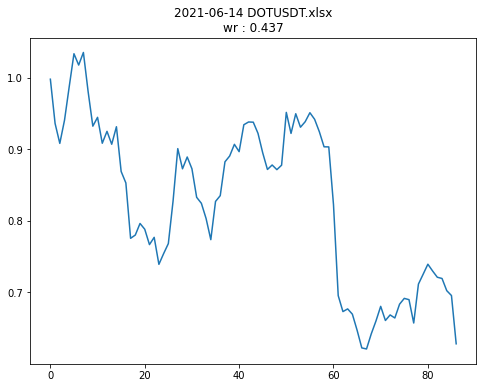

last_index : 24000
len(train_x) : 10500
len(val_x) : 3000
len(test_x) : 1500
test_slice_close_x.shape : (1500, 96, 1)
test_slice_label_close_x.shape : (1500, 24, 1)
train_labels.shape : (10500, 24, 12)
train_y.shape : (10500, 24, 1)

Epoch 1/200
329/329 [==============================] - 2s 4ms/step - loss: 0.7899 - mean_absolute_error: 0.6460 - val_loss: 1.9905 - val_mean_absolute_error: 1.0689

Epoch 00001: val_loss improved from inf to 1.99049, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_24000.h5
Epoch 2/200
329/329 [==============================] - 1s 4ms/step - loss: 0.7215 - mean_absolute_error: 0.6292 - val_loss: 1.9198 - val_mean_absolute_error: 1.0471

Epoch 00002: val_loss improved from 1.99049 to 1.91979, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_24000.h5
Epoch 3/200
329/329 [=====

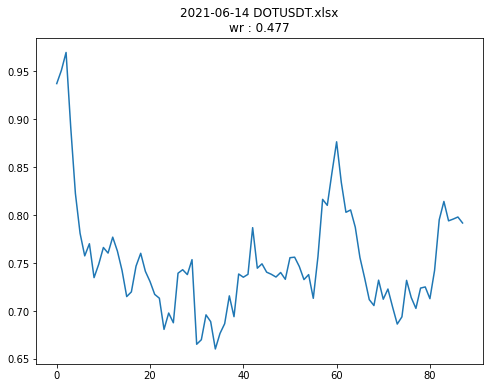

last_index : 25500
len(train_x) : 10500
len(val_x) : 3000
len(test_x) : 1500
test_slice_close_x.shape : (1500, 96, 1)
test_slice_label_close_x.shape : (1500, 24, 1)
train_labels.shape : (10500, 24, 12)
train_y.shape : (10500, 24, 1)

Epoch 1/200
329/329 [==============================] - 2s 4ms/step - loss: 0.7315 - mean_absolute_error: 0.6368 - val_loss: 1.9554 - val_mean_absolute_error: 1.0523

Epoch 00001: val_loss improved from inf to 1.95536, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_25500.h5
Epoch 2/200
329/329 [==============================] - 1s 4ms/step - loss: 0.6942 - mean_absolute_error: 0.6257 - val_loss: 1.9480 - val_mean_absolute_error: 1.0502

Epoch 00002: val_loss improved from 1.95536 to 1.94800, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_25500.h5
Epoch 3/200
329/329 [=====

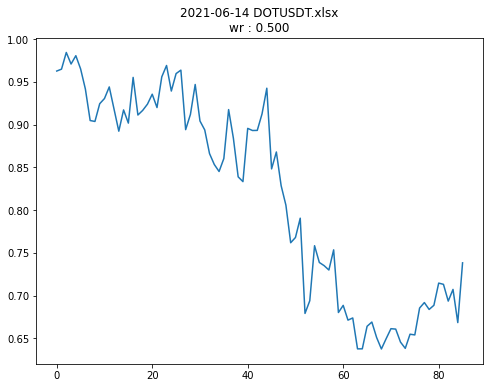

last_index : 27000
len(train_x) : 10500
len(val_x) : 3000
len(test_x) : 1500
test_slice_close_x.shape : (1500, 96, 1)
test_slice_label_close_x.shape : (1500, 24, 1)
train_labels.shape : (10500, 24, 12)
train_y.shape : (10500, 24, 1)

Epoch 1/200
329/329 [==============================] - 2s 4ms/step - loss: 0.7788 - mean_absolute_error: 0.6531 - val_loss: 1.8916 - val_mean_absolute_error: 1.0453

Epoch 00001: val_loss improved from inf to 1.89159, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_27000.h5
Epoch 2/200
329/329 [==============================] - 1s 4ms/step - loss: 0.7225 - mean_absolute_error: 0.6330 - val_loss: 1.8552 - val_mean_absolute_error: 1.0352

Epoch 00002: val_loss improved from 1.89159 to 1.85515, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_27000.h5
Epoch 3/200
329/329 [=====

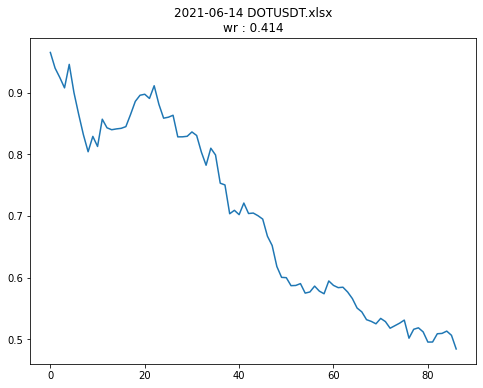

last_index : 28500
len(train_x) : 10500
len(val_x) : 3000
len(test_x) : 1500
test_slice_close_x.shape : (1500, 96, 1)
test_slice_label_close_x.shape : (1500, 24, 1)
train_labels.shape : (10500, 24, 12)
train_y.shape : (10500, 24, 1)

Epoch 1/200
329/329 [==============================] - 2s 5ms/step - loss: 0.7371 - mean_absolute_error: 0.6398 - val_loss: 2.0253 - val_mean_absolute_error: 1.0843

Epoch 00001: val_loss improved from inf to 2.02533, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_28500.h5
Epoch 2/200
329/329 [==============================] - 1s 4ms/step - loss: 0.6977 - mean_absolute_error: 0.6274 - val_loss: 1.9994 - val_mean_absolute_error: 1.0841

Epoch 00002: val_loss improved from 2.02533 to 1.99940, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn_ohlcmacd_lscale_mm_2021-06-14 DOTUSDT.xlsx_96_24_96_28500.h5
Epoch 3/200
329/329 [=====

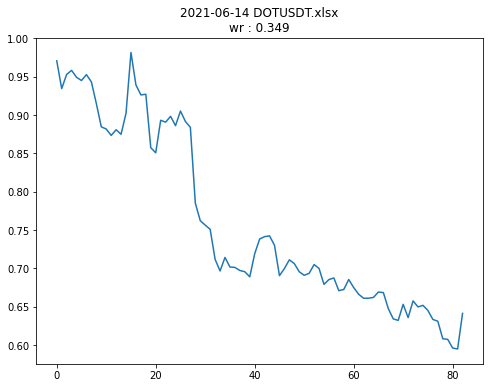

last_index : 30000


In [ ]:

#         1. data slicing      #
tvt_size = 15000
shift_size = int(tvt_size * 0.1)
shift_i = 0

#         2. calc, iteration number     #
# data_len = len(data_x)

target_label = target
target_label_index = column_indices[target_label]

while 1:



  last_index = tvt_size + shift_size * shift_i
  print("last_index :", last_index)
  # print("last_index :", last_index)

  slice_x = data_x[shift_size * shift_i :last_index]
  slice_labels = data_labels[shift_size * shift_i :last_index]
  slice_close_x = close_x[shift_size * shift_i :last_index]
  slice_label_close_x = label_close_x[shift_size * shift_i :last_index]

  if last_index > len(data_x):
    break

  else:
    shift_i += 1


  train_x = slice_x[:int(tvt_size * 0.7)]
  val_x = slice_x[int(tvt_size * 0.7):int(tvt_size * 0.9)]
  test_x = slice_x[int(tvt_size * 0.9):]

  print("len(train_x) :", len(train_x))
  print("len(val_x) :", len(val_x))
  print("len(test_x) :", len(test_x))

  train_labels = slice_labels[:int(tvt_size * 0.7)]
  val_labels = slice_labels[int(tvt_size * 0.7):int(tvt_size * 0.9)]
  test_labels = slice_labels[int(tvt_size * 0.9):]

  test_slice_close_x = slice_close_x[int(tvt_size * 0.9):]
  test_slice_label_close_x = slice_label_close_x[int(tvt_size * 0.9):]

  print("test_slice_close_x.shape :", test_slice_close_x.shape)
  print("test_slice_label_close_x.shape :", test_slice_label_close_x.shape)

  train_y = train_labels[:, :, [target_label_index]]
  val_y = val_labels[:, :, [target_label_index]]
  test_y = test_labels[:, :, [target_label_index]]

  print("train_labels.shape :", train_labels.shape)
  print("train_y.shape :", train_y.shape)
  print()


  #         train         #
  # model_name = 'multi_step_macdhist_cnn_ohlcmacd_lscale_std_%s_%s_%s_%s_%s.h5' % (key, input_size, label_size, CONV_WIDTH, last_index)
  model_name = 'multi_step_macdhist_cnn_ohlcmacd_lscale_mm_%s_%s_%s_%s_%s.h5' % (key, input_size, label_size, CONV_WIDTH, last_index)
  
  # multi_conv_model = conv_model()
  history = compile_and_fit(multi_conv_model, model_name, train_x, train_y, val_x, val_y)
  
  model = tf.keras.models.load_model(ckpt_path + model_name)
  test_result = model.predict(test_x)

  pred_y = test_result[:, :, target_label_index]

  fee = 0.0006
  lvrg = 5
  # lvrg = 1
  pr_list = []
  # plotting = True
  plotting = False

  i = 0
  while 1:
  # for i in range(len(test_y)):

    try:
      input = test_x[i, :, target_label_index]
    except:
      input = test_x[i, :, 0]


    label = test_y[i]
    pred = pred_y[i]

    input_close = test_slice_close_x[i, :, :]
    # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
    close = test_slice_label_close_x[i, :, :]

    #     find highest / lowest arg     #
    high_arg = np.argmax(pred)
    low_arg = np.argmin(pred)

    #     we always sell high, buy low    #
    pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

    if plotting:

      plt.subplot(211)
      plt.plot(np.arange(len(input_close)), input_close)
      plt.plot(np.arange(len(close)) + input_size, close)
      plt.axvline(high_arg + input_size)
      plt.axvline(low_arg + input_size)

      plt.subplot(212)
      plt.plot(np.arange(len(input)), input,
              label='Inputs', marker='.', zorder=-10)    
      plt.scatter(np.arange(len(label)) + input_size, label,
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
      plt.scatter(np.arange(len(pred)) + input_size, pred,
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)
      # plt.plot(pred)
      # plt.plot(label)
      plt.axvline(high_arg + input_size)
      plt.axvline(low_arg + input_size)


      plt.suptitle("%.3f" % pr)
      plt.show()

    pr_list.append(pr)

    #     i should moved to end of trading index    #
    #     long    #
    if high_arg > low_arg:
      i += high_arg
    else:
      i += low_arg

    # print("i :", i)

    if i >= len(test_y):
      break
    # else:
    #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

    #     shift, if trade complished    #

  pr_list = np.array(pr_list)
  wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

  plt.plot(np.cumprod(pr_list))
  plt.title("%s\nwr : %.3f" % (key, wr))
  plt.show()



##### check profit

In [ ]:
test_result = model.predict(test_x)

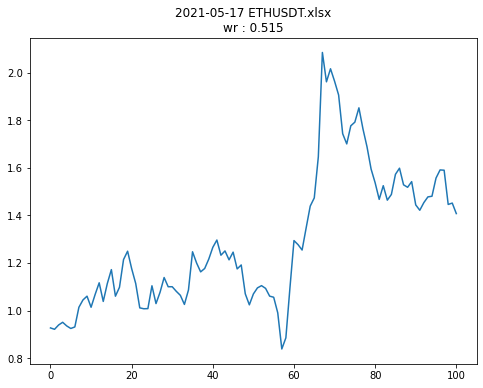

In [ ]:
pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
pr_list = []
# plotting = True
plotting = False

i = 0
while 1:
# for i in range(len(test_y)):

  try:
    input = test_x[i, :, target_label_index]
  except:
    input = test_x[i, :, 0]


  label = test_y[i]
  pred = pred_y[i]

  input_close = close_x[i, :, :]
  # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
  close = label_close_x[i, :, :]

  #     find highest / lowest arg     #
  high_arg = np.argmax(pred)
  low_arg = np.argmin(pred)

  #     we always sell high, buy low    #
  pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

  if plotting:

    plt.subplot(211)
    plt.plot(np.arange(len(input_close)), input_close)
    plt.plot(np.arange(len(close)) + input_size, close)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)

    plt.subplot(212)
    plt.plot(np.arange(len(input)), input,
             label='Inputs', marker='.', zorder=-10)    
    plt.scatter(np.arange(len(label)) + input_size, label,
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(np.arange(len(pred)) + input_size, pred,
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
    # plt.plot(pred)
    # plt.plot(label)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)


    plt.suptitle("%.3f" % pr)
    plt.show()

  pr_list.append(pr)

  #     i should moved to end of trading index    #
  #     long    #
  if high_arg > low_arg:
    i += high_arg
  else:
    i += low_arg

  # print("i :", i)

  if i >= len(test_y):
    break
  # else:
  #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

  #     shift, if trade complished    #

pr_list = np.array(pr_list)
wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

plt.plot(np.cumprod(pr_list))
plt.title("%s\nwr : %.3f" % (key, wr))
plt.show()


#### select target label

In [ ]:
try:
  input = train_x[0, :, target_label_index]
except:
  input = train_x[0, :, 0]  

label = train_y[0]

plt.plot(np.arange(len(input)), input,
          label='Inputs', marker='.', zorder=-10)    
plt.scatter(np.arange(len(label)) + input_size, label,
          edgecolors='k', label='Labels', c='#2ca02c', s=64)

plt.show()

In [ ]:
multi_val_performance = {}
multi_performance = {}

#### dense

In [ ]:
OUT_STEPS = label_size

multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

model_name = 'multi_step_macdhist_dense_macdhist_lscale_%s_%s_%s.h5' % (key, input_size, label_size)


In [ ]:
history = compile_and_fit(multi_dense_model, model_name)

IPython.display.clear_output()

In [ ]:
model = tf.keras.models.load_model(ckpt_path + model_name)

multi_val_performance['Dense'] = model.evaluate(val_x, val_y)
multi_performance['Dense'] = model.evaluate(test_x, test_y, verbose=1)

49/49 [==============================] - 0s 2ms/step - loss: 3.7937 - mean_absolute_error: 1.3819


##### check profit

In [ ]:
test_result = model.predict(test_x)

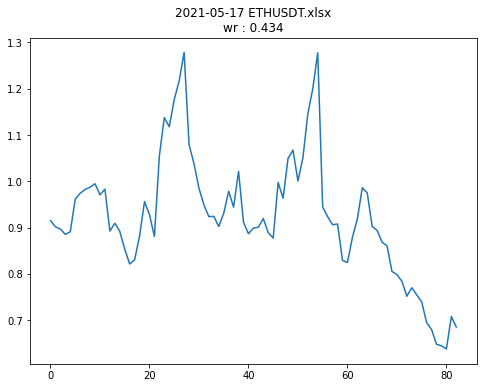

In [ ]:
pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
pr_list = []
# plotting = True
plotting = False

i = 0
while 1:
# for i in range(len(test_y)):

  try:
    input = test_x[i, :, target_label_index]
  except:
    input = test_x[i, :, 0]


  label = test_y[i]
  pred = pred_y[i]

  input_close = close_x[i, :, :]
  # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
  close = label_close_x[i, :, :]

  #     find highest / lowest arg     #
  high_arg = np.argmax(pred)
  low_arg = np.argmin(pred)

  #     we always sell high, buy low    #
  pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

  if plotting:

    plt.subplot(211)
    plt.plot(np.arange(len(input_close)), input_close)
    plt.plot(np.arange(len(close)) + input_size, close)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)

    plt.subplot(212)
    plt.plot(np.arange(len(input)), input,
             label='Inputs', marker='.', zorder=-10)    
    plt.scatter(np.arange(len(label)) + input_size, label,
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(np.arange(len(pred)) + input_size, pred,
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
    # plt.plot(pred)
    # plt.plot(label)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)


    plt.suptitle("%.3f" % pr)
    plt.show()

  pr_list.append(pr)

  #     i should moved to end of trading index    #
  #     long    #
  if high_arg > low_arg:
    i += high_arg
  else:
    i += low_arg

  # print("i :", i)

  if i >= len(test_y):
    break
  # else:
  #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

  #     shift, if trade complished    #

pr_list = np.array(pr_list)
wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

plt.plot(np.cumprod(pr_list))
plt.title("%s\nwr : %.3f" % (key, wr))
plt.show()


#### lstm

In [ ]:
OUT_STEPS = label_size

multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

model_name = 'multi_step_macdhist_lstm_macdhist_lscale_%s_%s_%s.h5' % (key, input_size, label_size)


In [ ]:
history = compile_and_fit(multi_lstm_model, model_name)

IPython.display.clear_output()

In [ ]:
model = tf.keras.models.load_model(ckpt_path + model_name)

multi_val_performance['Dense'] = model.evaluate(val_x, val_y)
multi_performance['Dense'] = model.evaluate(test_x, test_y, verbose=1)

49/49 [==============================] - 0s 3ms/step - loss: 3.5484 - mean_absolute_error: 1.2996


##### check profit

In [ ]:
test_result = model.predict(test_x)

In [ ]:
pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
pr_list = []
# plotting = True
plotting = False

i = 0
while 1:
# for i in range(len(test_y)):

  try:
    input = test_x[i, :, target_label_index]
  except:
    input = test_x[i, :, 0]


  label = test_y[i]
  pred = pred_y[i]

  input_close = close_x[i, :, :]
  # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
  close = label_close_x[i, :, :]

  #     find highest / lowest arg     #
  high_arg = np.argmax(pred)
  low_arg = np.argmin(pred)

  #     we always sell high, buy low    #
  pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

  if plotting:

    plt.subplot(211)
    plt.plot(np.arange(len(input_close)), input_close)
    plt.plot(np.arange(len(close)) + input_size, close)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)

    plt.subplot(212)
    plt.plot(np.arange(len(input)), input,
             label='Inputs', marker='.', zorder=-10)    
    plt.scatter(np.arange(len(label)) + input_size, label,
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(np.arange(len(pred)) + input_size, pred,
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
    # plt.plot(pred)
    # plt.plot(label)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)


    plt.suptitle("%.3f" % pr)
    plt.show()

  pr_list.append(pr)

  #     i should moved to end of trading index    #
  #     long    #
  if high_arg > low_arg:
    i += high_arg
  else:
    i += low_arg

  # print("i :", i)

  if i >= len(test_y):
    break
  # else:
  #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

  #     shift, if trade complished    #

pr_list = np.array(pr_list)
wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

plt.plot(np.cumprod(pr_list))
plt.title("%s\nwr : %.3f" % (key, wr))
plt.show()


#### cnn 1d

In [ ]:
# CONV_WIDTH = 3
# CONV_WIDTH = 12
# CONV_WIDTH = input_size
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    # tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(3)),
    # tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(3)),

    tf.keras.layers.Flatten(),

    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(label_size*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, label_size, features]
    tf.keras.layers.Reshape([label_size, num_features])
])

# key = "2021-06-14 ETHUSDT.xlsx"
# key = "2021-05-17 ETHUSDT.xlsx"
model_name = 'multi_step_macdhist_cnn1d_macdhist_lscale_std_%s_%s_%s.h5' % (key, input_size, label_size)

In [ ]:
history = compile_and_fit(multi_conv_model, model_name)


IPython.display.clear_output()

In [ ]:
model = tf.keras.models.load_model(ckpt_path + model_name)

multi_val_performance['CNN1d'] = model.evaluate(val_x, val_y)
multi_performance['CNN1d'] = model.evaluate(test_x, test_y, verbose=1)

49/49 [==============================] - 1s 13ms/step - loss: 0.9891 - mean_absolute_error: 0.7405


##### check profit

In [ ]:
test_result = model.predict(test_x)

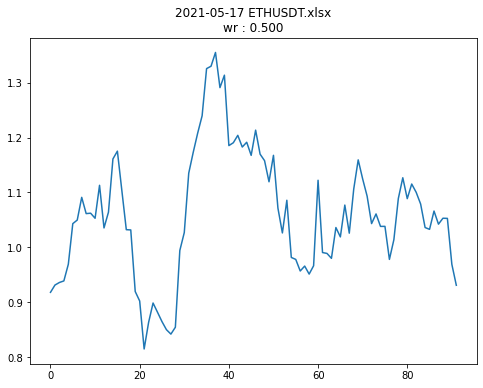

In [ ]:
pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
pr_list = []
# plotting = True
plotting = False

i = 0
while 1:
# for i in range(len(test_y)):

  try:
    input = test_x[i, :, target_label_index]
  except:
    input = test_x[i, :, 0]


  label = test_y[i]
  pred = pred_y[i]

  input_close = close_x[i, :, :]
  # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
  close = label_close_x[i, :, :]

  #     find highest / lowest arg     #
  high_arg = np.argmax(pred)
  low_arg = np.argmin(pred)

  #     we always sell high, buy low    #
  pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

  if plotting:

    plt.subplot(211)
    plt.plot(np.arange(len(input_close)), input_close)
    plt.plot(np.arange(len(close)) + input_size, close)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)

    plt.subplot(212)
    plt.plot(np.arange(len(input)), input,
             label='Inputs', marker='.', zorder=-10)    
    plt.scatter(np.arange(len(label)) + input_size, label,
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(np.arange(len(pred)) + input_size, pred,
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
    # plt.plot(pred)
    # plt.plot(label)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)


    plt.suptitle("%.3f" % pr)
    plt.show()

  pr_list.append(pr)

  #     i should moved to end of trading index    #
  #     long    #
  if high_arg > low_arg:
    i += high_arg
  else:
    i += low_arg

  # print("i :", i)

  if i >= len(test_y):
    break
  # else:
  #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

  #     shift, if trade complished    #

pr_list = np.array(pr_list)
wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

plt.plot(np.cumprod(pr_list))
plt.title("%s\nwr : %.3f" % (key, wr))
plt.show()


#### cnn 2d

In [ ]:
# CONV_WIDTH = 3
# CONV_WIDTH = 12
# CONV_WIDTH = input_size
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    # tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv2D(256, activation='relu', kernel_size=(3)),
    # tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(3)),

    tf.keras.layers.Flatten(),

    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(label_size*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, label_size, features]
    tf.keras.layers.Reshape([label_size, num_features])
])

# key = "2021-06-14 ETHUSDT.xlsx"
# key = "2021-05-17 ETHUSDT.xlsx"
# model_name = 'multi_step_macdhist_cnn2d_macdhist_lscale_std_%s_%s_%s.h5' % (key, input_size, label_size)
model_name = 'multi_step_macdhist_cnn2d_ohlcmacd_lscale_std_%s_%s_%s.h5' % (key, input_size, label_size)

In [ ]:
history = compile_and_fit(multi_conv_model, model_name)


IPython.display.clear_output()

Epoch 1/200
343/343 [==============================] - 64s 186ms/step - loss: 1.1681 - mean_absolute_error: 0.7786 - val_loss: 1.0932 - val_mean_absolute_error: 0.7604

Epoch 00001: val_loss improved from inf to 1.09318, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn2d_ohlcmacd_lscale_std_2021-05-17 ETHUSDT.xlsx_96_24.h5
Epoch 2/200
343/343 [==============================] - 65s 188ms/step - loss: 1.0896 - mean_absolute_error: 0.7459 - val_loss: 1.0951 - val_mean_absolute_error: 0.7627

Epoch 00002: val_loss did not improve from 1.09318
Epoch 3/200
343/343 [==============================] - 64s 187ms/step - loss: 1.0517 - mean_absolute_error: 0.7305 - val_loss: 1.1023 - val_mean_absolute_error: 0.7542

Epoch 00003: val_loss did not improve from 1.09318
Epoch 4/200
343/343 [==============================] - 64s 186ms/step - loss: 1.0205 - mean_absolute_error: 0.7195 - val_loss: 1.0956 - val_mean_absolute_error: 0.7605

Epoch 00004: val_loss did 

In [ ]:
model = tf.keras.models.load_model(ckpt_path + model_name)

multi_val_performance['CNN'] = model.evaluate(val_x, val_y)
multi_performance['CNN'] = model.evaluate(test_x, test_y, verbose=1)

49/49 [==============================] - 0s 2ms/step - loss: 1.0011 - mean_absolute_error: 0.7511


##### check profit

In [ ]:
test_result = model.predict(test_x)

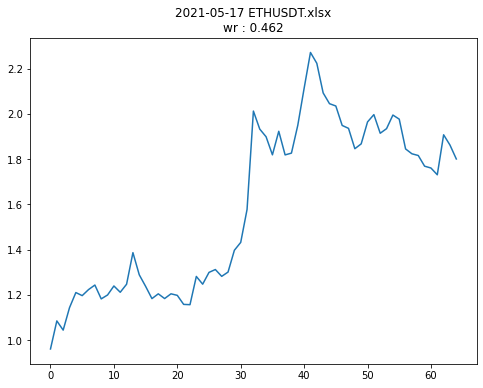

In [ ]:
pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
pr_list = []
# plotting = True
plotting = False

i = 0
while 1:
# for i in range(len(test_y)):

  try:
    input = test_x[i, :, target_label_index]
  except:
    input = test_x[i, :, 0]


  label = test_y[i]
  pred = pred_y[i]

  input_close = close_x[i, :, :]
  # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
  close = label_close_x[i, :, :]

  #     find highest / lowest arg     #
  high_arg = np.argmax(pred)
  low_arg = np.argmin(pred)

  #     we always sell high, buy low    #
  pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

  if plotting:

    plt.subplot(211)
    plt.plot(np.arange(len(input_close)), input_close)
    plt.plot(np.arange(len(close)) + input_size, close)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)

    plt.subplot(212)
    plt.plot(np.arange(len(input)), input,
             label='Inputs', marker='.', zorder=-10)    
    plt.scatter(np.arange(len(label)) + input_size, label,
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(np.arange(len(pred)) + input_size, pred,
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
    # plt.plot(pred)
    # plt.plot(label)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)


    plt.suptitle("%.3f" % pr)
    plt.show()

  pr_list.append(pr)

  #     i should moved to end of trading index    #
  #     long    #
  if high_arg > low_arg:
    i += high_arg
  else:
    i += low_arg

  # print("i :", i)

  if i >= len(test_y):
    break
  # else:
  #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

  #     shift, if trade complished    #

pr_list = np.array(pr_list)
wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

plt.plot(np.cumprod(pr_list))
plt.title("%s\nwr : %.3f" % (key, wr))
plt.show()


#### deep cnn 2d

In [ ]:
# CONV_WIDTH = 3
# CONV_WIDTH = 12
# CONV_WIDTH = input_size
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    # tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv2D(32, activation='relu', kernel_size=(3)),
    tf.keras.layers.Conv2D(64, activation='relu', kernel_size=(3)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, activation='relu', kernel_size=(3)),
    tf.keras.layers.Conv2D(256, activation='relu', kernel_size=(3)),
    tf.keras.layers.BatchNormalization(),

    # tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(3)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),

    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(label_size*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, label_size, features]
    tf.keras.layers.Reshape([label_size, num_features])
])

# key = "2021-06-14 ETHUSDT.xlsx"
# key = "2021-05-17 ETHUSDT.xlsx"
# model_name = 'multi_step_macdhist_cnn2d_macdhist_lscale_std_%s_%s_%s.h5' % (key, input_size, label_size)
model_name = 'multi_step_macdhist_cnn2d_ohlcmacd_lscale_std_%s_%s_%s.h5' % (key, input_size, label_size)

In [ ]:
history = compile_and_fit(multi_conv_model, model_name)


IPython.display.clear_output()

Epoch 1/200
343/343 [==============================] - 64s 186ms/step - loss: 1.1681 - mean_absolute_error: 0.7786 - val_loss: 1.0932 - val_mean_absolute_error: 0.7604

Epoch 00001: val_loss improved from inf to 1.09318, saving model to /content/drive/My Drive/Colab Notebooks/300/ckpt/multi_step_macdhist_cnn2d_ohlcmacd_lscale_std_2021-05-17 ETHUSDT.xlsx_96_24.h5
Epoch 2/200
343/343 [==============================] - 65s 188ms/step - loss: 1.0896 - mean_absolute_error: 0.7459 - val_loss: 1.0951 - val_mean_absolute_error: 0.7627

Epoch 00002: val_loss did not improve from 1.09318
Epoch 3/200
  4/343 [..............................] - ETA: 59s - loss: 0.8954 - mean_absolute_error: 0.6936

In [ ]:
model = tf.keras.models.load_model(ckpt_path + model_name)

multi_val_performance['CNN'] = model.evaluate(val_x, val_y)
multi_performance['CNN'] = model.evaluate(test_x, test_y, verbose=1)

49/49 [==============================] - 0s 2ms/step - loss: 1.0011 - mean_absolute_error: 0.7511


##### check profit

In [ ]:
test_result = model.predict(test_x)

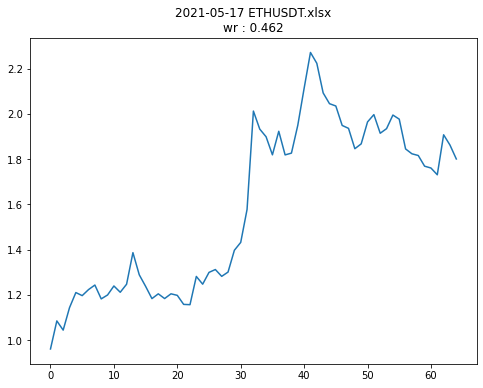

In [ ]:
pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
pr_list = []
# plotting = True
plotting = False

i = 0
while 1:
# for i in range(len(test_y)):

  try:
    input = test_x[i, :, target_label_index]
  except:
    input = test_x[i, :, 0]


  label = test_y[i]
  pred = pred_y[i]

  input_close = close_x[i, :, :]
  # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
  close = label_close_x[i, :, :]

  #     find highest / lowest arg     #
  high_arg = np.argmax(pred)
  low_arg = np.argmin(pred)

  #     we always sell high, buy low    #
  pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

  if plotting:

    plt.subplot(211)
    plt.plot(np.arange(len(input_close)), input_close)
    plt.plot(np.arange(len(close)) + input_size, close)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)

    plt.subplot(212)
    plt.plot(np.arange(len(input)), input,
             label='Inputs', marker='.', zorder=-10)    
    plt.scatter(np.arange(len(label)) + input_size, label,
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(np.arange(len(pred)) + input_size, pred,
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
    # plt.plot(pred)
    # plt.plot(label)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)


    plt.suptitle("%.3f" % pr)
    plt.show()

  pr_list.append(pr)

  #     i should moved to end of trading index    #
  #     long    #
  if high_arg > low_arg:
    i += high_arg
  else:
    i += low_arg

  # print("i :", i)

  if i >= len(test_y):
    break
  # else:
  #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

  #     shift, if trade complished    #

pr_list = np.array(pr_list)
wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

plt.plot(np.cumprod(pr_list))
plt.title("%s\nwr : %.3f" % (key, wr))
plt.show()


#### autoregressive

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

feedback_model = FeedBack(units=32, out_steps=label_size)

def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup
prediction, state = feedback_model.warmup(train_x)
prediction.shape

TensorShape([11022, 12])

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call
print('Output shape (batch, time, features): ', feedback_model(train_x).shape)
# print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (11022, 24, 12)


In [ ]:
# history = compile_and_fit(feedback_model, multi_window)

model_name = 'multi_step_macdhist_ar_allfeature_lscale_std_%s_%s_%s.h5' % (key, input_size, label_size)

history = compile_and_fit(feedback_model, model_name)

IPython.display.clear_output()

In [ ]:
# model = tf.keras.models.load_model(ckpt_path + model_name)

multi_val_performance['AR'] = feedback_model.evaluate(val_x, val_y)
multi_performance['AR'] = feedback_model.evaluate(test_x, test_y, verbose=1)

49/49 [==============================] - 0s 5ms/step - loss: 2.3948 - mean_absolute_error: 1.1002


##### check profit

In [ ]:
test_result = feedback_model.predict(test_x)

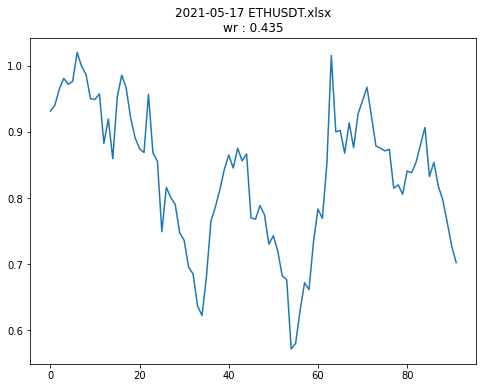

In [ ]:
pred_y = test_result[:, :, target_label_index]

fee = 0.0006
lvrg = 5
# lvrg = 1
pr_list = []
# plotting = True
plotting = False

i = 0
while 1:
# for i in range(len(test_y)):

  try:
    input = test_x[i, :, target_label_index]
  except:
    input = test_x[i, :, 0]


  label = test_y[i]
  pred = pred_y[i]

  input_close = close_x[i, :, :]
  # input_close = test_x[i, :, 3] * train_std['close'] + train_mean['close']
  close = label_close_x[i, :, :]

  #     find highest / lowest arg     #
  high_arg = np.argmax(pred)
  low_arg = np.argmin(pred)

  #     we always sell high, buy low    #
  pr = (close[high_arg] / close[low_arg] - 1 - fee) * lvrg + 1

  if plotting:

    plt.subplot(211)
    plt.plot(np.arange(len(input_close)), input_close)
    plt.plot(np.arange(len(close)) + input_size, close)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)

    plt.subplot(212)
    plt.plot(np.arange(len(input)), input,
             label='Inputs', marker='.', zorder=-10)    
    plt.scatter(np.arange(len(label)) + input_size, label,
              edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(np.arange(len(pred)) + input_size, pred,
                marker='X', edgecolors='k', label='Predictions',
                c='#ff7f0e', s=64)
    # plt.plot(pred)
    # plt.plot(label)
    plt.axvline(high_arg + input_size)
    plt.axvline(low_arg + input_size)


    plt.suptitle("%.3f" % pr)
    plt.show()

  pr_list.append(pr)

  #     i should moved to end of trading index    #
  #     long    #
  if high_arg > low_arg:
    i += high_arg
  else:
    i += low_arg

  # print("i :", i)

  if i >= len(test_y):
    break
  # else:
  #   pr = (close[low_arg] / close[high_arg] - 1 - fee) * lvrg + 1

  #     shift, if trade complished    #

pr_list = np.array(pr_list)
wr = len(pr_list[pr_list > 1]) / len(pr_list[pr_list != 1])

plt.plot(np.cumprod(pr_list))
plt.title("%s\nwr : %.3f" % (key, wr))
plt.show()


#### comparison

In [ ]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Dense   : 1.8391
LSTM    : 1.9033
Conv    : 1.8230
AR LSTM : 2.3262
